<table width="100%">
  <tr>
    <td>
      <h1 style="text-align: left; font-size:300%;">Data Preparation Pipeline</h1>
      <h2 style="text-align: left; font-size:200%;">Project ID: 20</h2>
      <h3 style="text-align: left; font-size:150%;">Dataset 9: Comune di Milano Esercizi di vicinato in sede fissa</h3>
      <table align="left">
        <tr>
          <td style="text-align: left; font-size: 120%;">Sara Resta</td>
          <td style="text-align: left; font-size: 120%;">10667600</td>
          <td style="text-align: left; font-size: 120%;"><a href="mailto:sara.resta@mail.polimi.it">sara.resta@mail.polimi.it</a></td>
        </tr>
        <tr>
          <td style="text-align: left; font-size: 120%;">Francesco Scroccarello</td>
          <td style="text-align: left; font-size: 120%;">10723028</td>
          <td style="text-align: left; font-size: 120%;"><a href="mailto:francesco.scroccarello@mail.polimi.it">francesco.scroccarello@mail.polimi.it</a></td>
        </tr>
      </table>
    </td>
    <td width="20%">
      <div style="text-align: right">
          <br>
        <b style="font-size: 150%;">Data and Information quality course</b><br>
        <b>a.y. 2024-2025</b>
          <br><br>
        prof. Cinzia Cappiello<br>
        t.a. Camilla Sancricca
      </div>
    </td>
  </tr>
</table>


# Contents
1. [Imports and utilities](#1.-Imports-and-utilities)  
2. [Data Profiling and Data Quality assessment](#2.-Data-Profiling-and-Data-Quality-assessment)  
    2.1. [Basic profiling operations](#2.1.-Basic-profiling-operations)  
    2.2. [Single column analysis](#2.2.-Single-column-analysis)  
    &emsp; 2.2.1. [Cardinalities](#2.2.1.-Cardinalities)  
    &emsp; 2.2.2. [Values distributions](#2.2.2.-Values-distributions)  
    2.3. [Dependency Discovery](#2.3.-Dependency-Discovery)  
    &emsp; 2.3.1. [Superfici Columns](#2.3.1.-Superfici-Columns)  
    &emsp; 2.3.2. [Ubicazione, Tipo via, Civico, ZD](#2.3.2.-Ubicazione,-Tipo-via,-Civico,-ZD)  
    &emsp; 2.3.3. [Association rules](#2.3.3.-Association-rules)
3. [DQ assessment](#3.-DQ-assesment)  
    3.1. [Cardinalities](#3.1.-Cardinalities)  
    3.2. [Completeness](#3.2.-Completeness)  
    3.3. [Consistency](#3.3.-Consistency)
4. [Data Wrangling](#4.-Data-Wrangling)  
    4.1. [Settore Merceologico](#4.1.-Settore-Merceologico)  
    4.2. [Insegna](#4.2.-Insegna)  
    4.3. [Ubicazione](#4.3.-Ubicazione)  
    4.4. [Tipo via, Via, Civico, Codice via, Settore Storico Cf Preval](#4.4.-Tipo-via-Via,-Civico,-Codice-via,-Settore-Storico-Cf-Preval)  
    4.5. [Superficie](#4.5.-Superficie)
5. [Inconsistencies](#5.-Inconsistencies)  
    5.1. [Inconsistencies with columns related to address](#5.1.-Inconsistencies-with-columns-related-to-address)  
    5.2. [Inconsistencies in columns related to Superficie](#5.2.-Inconsistencies-in-columns-related-to-Superficie)  
6. [Missing values handling](#5.-Missing-values-handling)  
    6.1. [Tipo via, Via, Civico, Codice via, ZD](#6.1.-Tipo-via-Via,-Civico,-Codice-via,-ZD)  
    6.2. [Accesso, Isolato, Website, Altre Info](#6.2.-Accesso,-Isolato,-Website,-Altre-Info)  
    6.3. [Superficie](#6.3.-Superficie)  
    6.4. [Settore Merceologico Secondario, Insegna and Settore Storico Cf Preval](#6.4.-Settore-Merceologico-Secondario,-Insegna-and-Settore-Storico-Cf-Preval)  
    6.5. [Settore Merceologico Principale](#6.5.-Settore-Merceologico-Principale)
7. [Outliers handling](#7.-Outliers-handling)  
    7.1. [Settore Merceologico Principale](#7.1.-Settore-Merceologico-Principale)  
    7.2. [Settore Merceologico Secondario](#7.2.-Settore-Merceologico-Secondario)  
    7.3. [Tipo via](#7.3.-Tipo-via)  
    7.4. [Civico](#7.4.-Civico)  
    7.5. [Codice via](#7.5.-Codice-via)  
    7.6. [Accesso](#7.6.-Accesso)  
    7.7. [Isolato](#7.7.-Isolato)  
    7.8. [Settore Storico Cf Preval](#7.8.-Settore-Storico-Cf-Preval)  
    7.9. [Superficie Vendita](#7.9.-Superficie-Vendita)  
    7.10. [Superficie Altri Usi](#7.10.-Superficie-Altri-Usi)  
    7.11. [Feature-based anomaly detection](#7.11.-Feature-based-anomaly-detection)  
8. [Duplicates handling](#8.-Duplicates-handling)  
9. [DQ Assessment on the cleaned dataset](#9.-DQ-Assesment-on-the-cleaned-dataset)  
10. [Performance analysis](#10.-Performance-analysis)  
    10.1. [Clustering using dirty dataset](#10.1.-Clustering-using-dirty-dataset)  
    10.2. [Clustering using cleaned dataset](#10.2.-Clustering-using-the-cleaned-dataset)

# 1. Imports and utilities
[$\leftarrow$ Back to contents](#Contents)

In [1]:
# Libraries to handle datasets
import pandas as pd
import numpy as np

# Libraries for plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", DeprecationWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
os.environ["PYTHONWARNINGS"] = "ignore"

# Statistics
from scipy.stats import pearsonr, spearmanr, shapiro
from scipy.stats import t as t_student

# ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor, KernelDensity
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

# Word embedding
from gensim.models import Word2Vec

# Association rules libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

# Record Linkage
import recordlinkage


`ZD` column shows administrative divisions of Milan as can be seen [here](https://it.wikipedia.org/wiki/Municipi_di_Milano). These divisions are reported as integer number in the `.csv` file but they represent a category and not a numerical variable. For this reason, this column is imported as `string`.   

<div style="text-align: center;">
    <figure>
        <img src="milan_administrative_divisions.png" alt="Milan Administrative divisions" width="300">
        <figcaption style="font-style: italic;">Milan administrative divisions.</figcaption>
    </figure>
</div>  


In [2]:
# import of the dataset
df = pd.read_csv("Comune-di-Milano-Esercizi-di-vicinato-in-sede-fissa-dirty.csv", sep=';', encoding='latin1', dtype={'ZD': str})

In [3]:
# show first 10 records just for a visualization
df.head()

,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,CSO ITALIA N. 34 (z.d. 1),CSO,ITALIA,34,526,1,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,CSO LODI N. 104 (z.d. 4),CSO,LODI,104,4068,4,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,CSO LODI N. 26 (z.d. 5),CSO,LODI,26,4068,5,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,CSO SEMPIONE N. 41 (z.d. 6),CSO,SEMPIONE,41,7137,8,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,LGO SCALABRINI GIOVANNI BATTISTA N. 2 (z.d. 6),LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NaN,0.0,NaN,NaN,0.0


# 2. Data Profiling
[$\leftarrow$ Back to contents](#Contents)

## 2.1. Basic profiling operations

In [4]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print(f"Num of rows: {n_rows}\nNum of columns: {n_cols}")

Num of rows: 24136
Num of columns: 13


In [5]:
print("COLUMNS OF THE DATASET:")
for col in df.columns:
    print(f"{col}")

COLUMNS OF THE DATASET:
Settore Merceologico
Insegna
Ubicazione
Tipo via
Via
Civico
Codice via
ZD
Settore Storico Cf Preval
Superficie Vendita
Superficie Altri Usi
Superficie Tabelle Speciali
Superficie Totale


In [6]:
# show for each column the type of its elements
df.dtypes

Settore Merceologico            object
Insegna                         object
Ubicazione                      object
Tipo via                        object
Via                             object
Civico                          object
Codice via                      object
ZD                              object
Settore Storico Cf Preval       object
Superficie Vendita             float64
Superficie Altri Usi           float64
Superficie Tabelle Speciali    float64
Superficie Totale              float64
dtype: object

In [7]:
# separate numerical variables from categorical
num = df[df.select_dtypes(include=['float64']).columns] 
cat = df[df.select_dtypes(include=['object']).columns]

## 2.2. Single column analysis
[$\leftarrow$ Back to contents](#Contents)

### 2.2.1. Cardinalities

For each column, we compute:

- Missing: number of missing values
- Actual: count of the number of records with an actual value (*i.e.,* not-null).
- Cardinality: count of the number of distinct actual values.
- Uniqueness: percentage calculated as Cardinality divided by the total number of records.
- Distinctness: percentage calculated as Cardinality divided by Actual.
- Constancy: "how frequent" is the most frequent value (can help spot standards)

In [8]:
# perform single column analysis for each column
sc_analysis = pd.DataFrame(columns=df.columns,index=['Missing','Actual','Cardinality'])

for col in df.columns:
    cardinality = df[col].nunique() # number of unique values
    actual = df[col].notnull().sum() # number of not null values
    nnull = df[col].isnull().sum() # number of null values

    sc_analysis.loc['Missing', col] = nnull
    sc_analysis.loc['Cardinality', col] = cardinality
    sc_analysis.loc['Actual', col] = actual
    
sc_analysis


,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
Missing,105,17147,1,2,1,650,2,2,33,30,15098,23009,36
Actual,24031,6989,24135,24134,24135,23486,24134,24134,24103,24106,9038,1127,24100
Cardinality,56,5583,16907,20,2331,386,2348,10,2228,250,438,117,642


### 2.2.2. Values distributions
[$\leftarrow$ Back to contents](#Contents)

In [9]:
# extract basic statistics for the numerical variables
stats = num.describe()
stats

,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
count,24106.000000,9038.000000,1127.000000,24100.000000
mean,56.762715,67.852069,37.138421,98.350747
std,49.281531,280.890686,29.824418,266.692535
min,0.000000,0.000000,1.000000,0.000000
25%,25.000000,10.000000,13.000000,35.000000
50%,40.000000,21.000000,30.000000,55.000000
75%,70.000000,50.000000,52.500000,100.000000
max,250.000000,9056.000000,230.000000,11942.000000


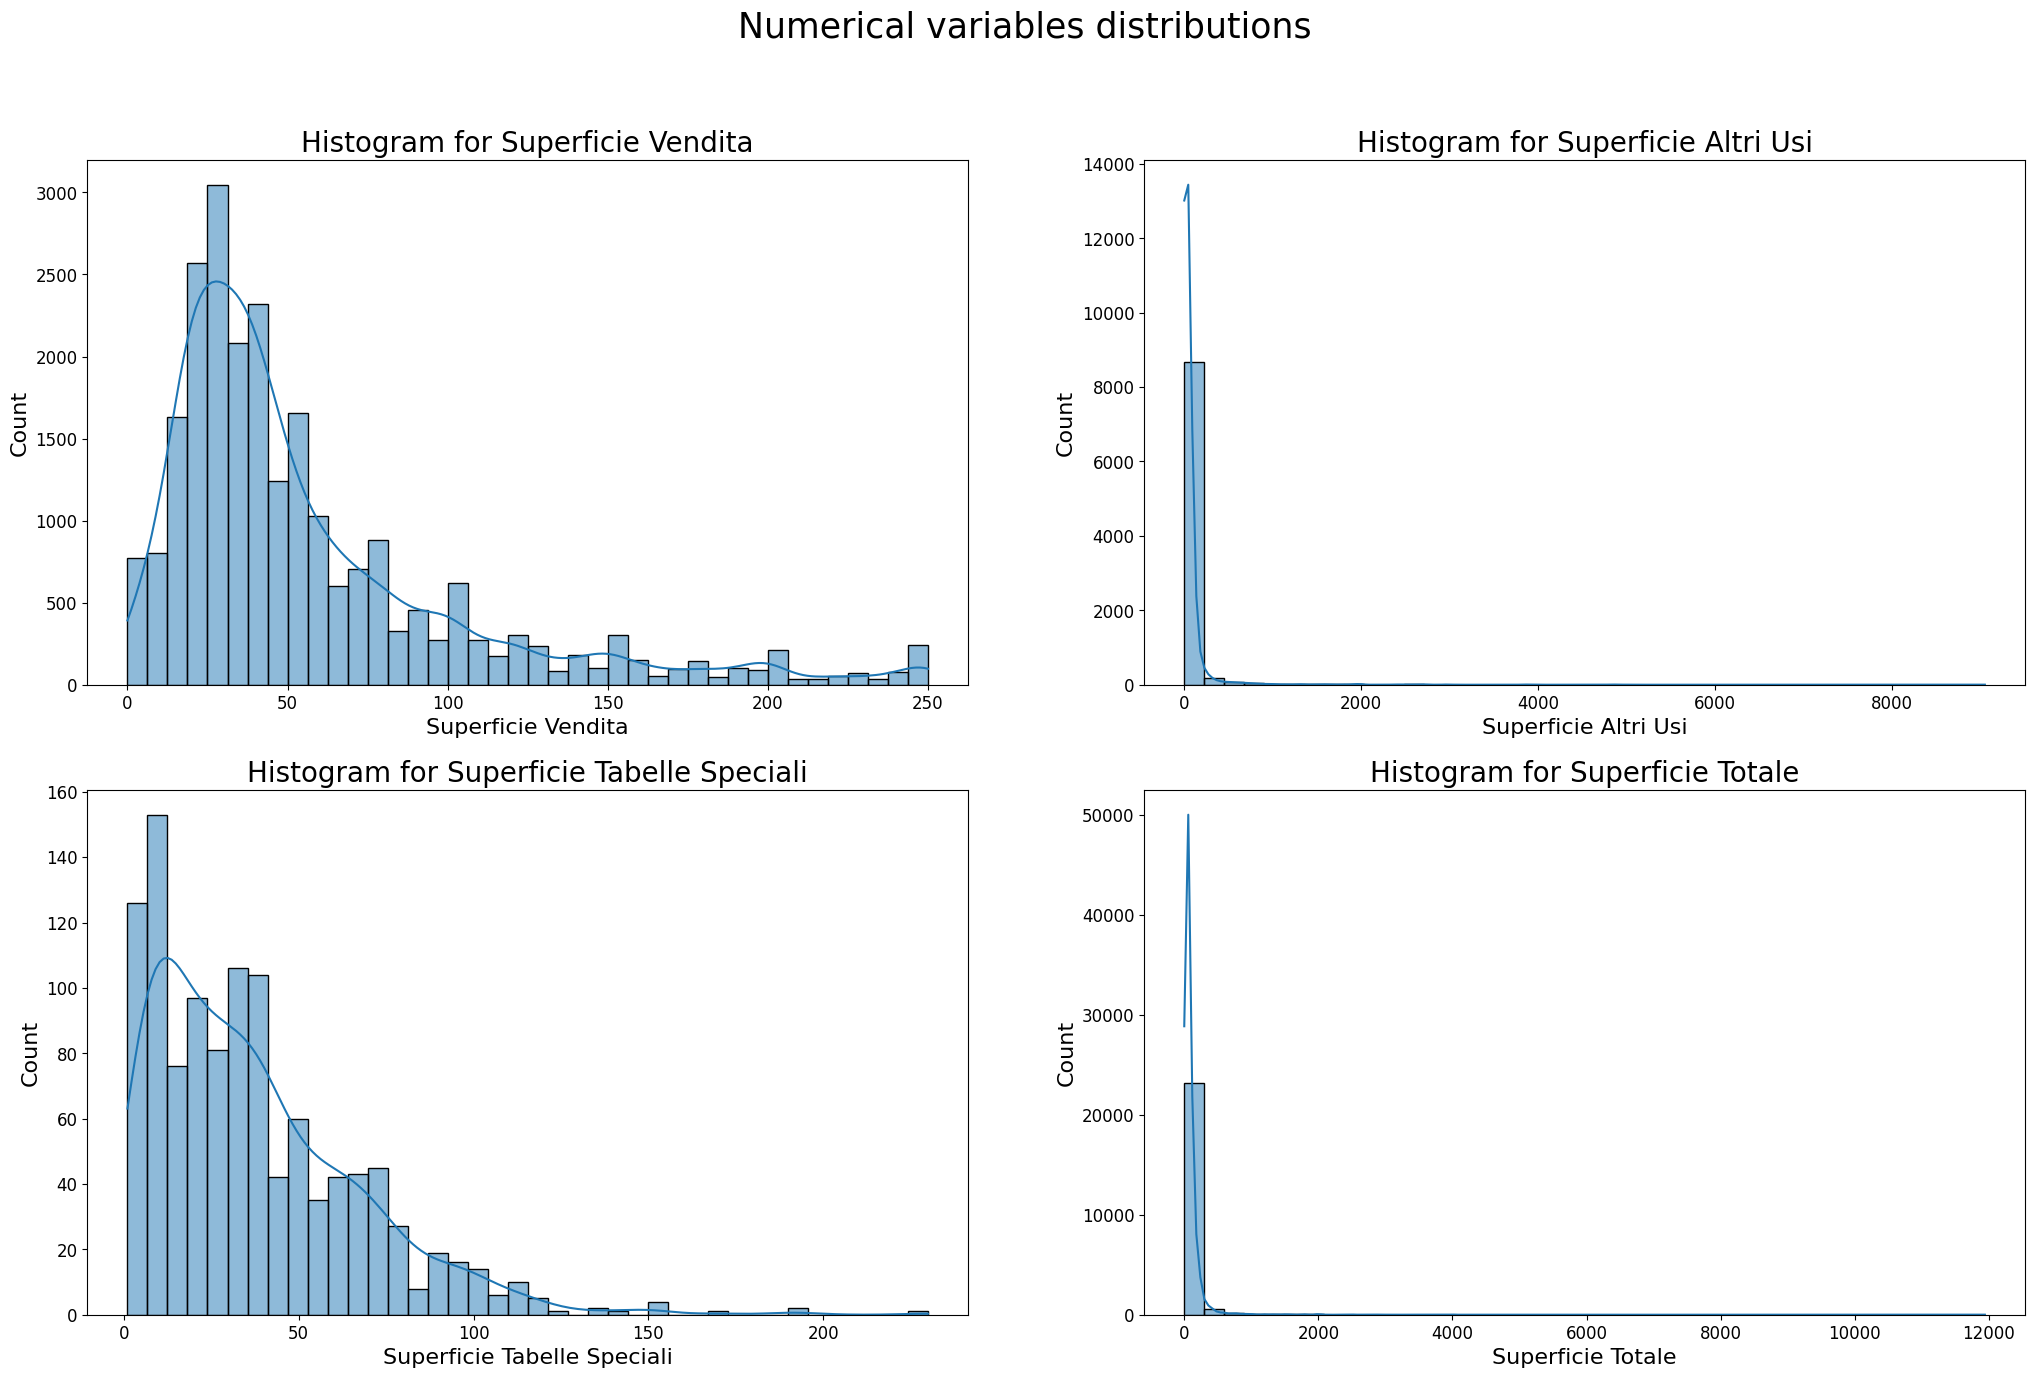

In [10]:
# Plot values distributions
plt.figure(figsize=(25,15))
plt.suptitle("Numerical variables distributions", fontsize=25)
for i, col in enumerate(num):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Histogram for {col}",fontsize=20)
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.xlabel(f"{col}", fontsize=16)
    plt.ylabel("Count", fontsize=16)

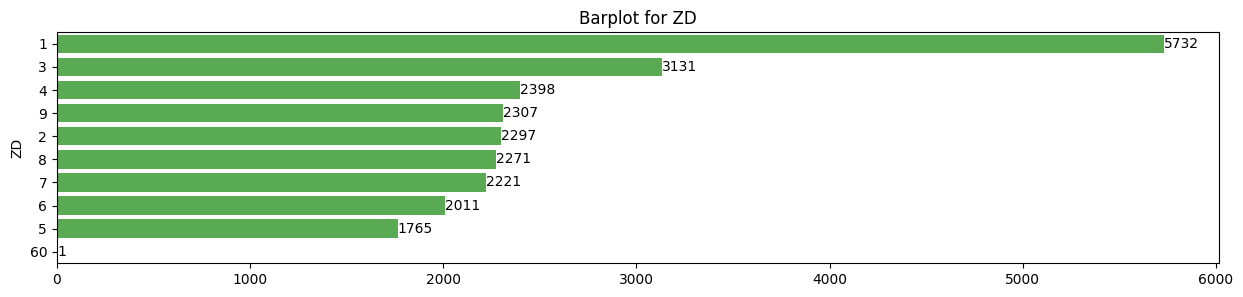

In [11]:
col ='ZD'
plt.figure(figsize=(15,3))
ax = sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index,
             errorbar=None, order=df[col].value_counts().index, color='#4CB944')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title(f"Barplot for {col}")
plt.ylabel(f"{col}");

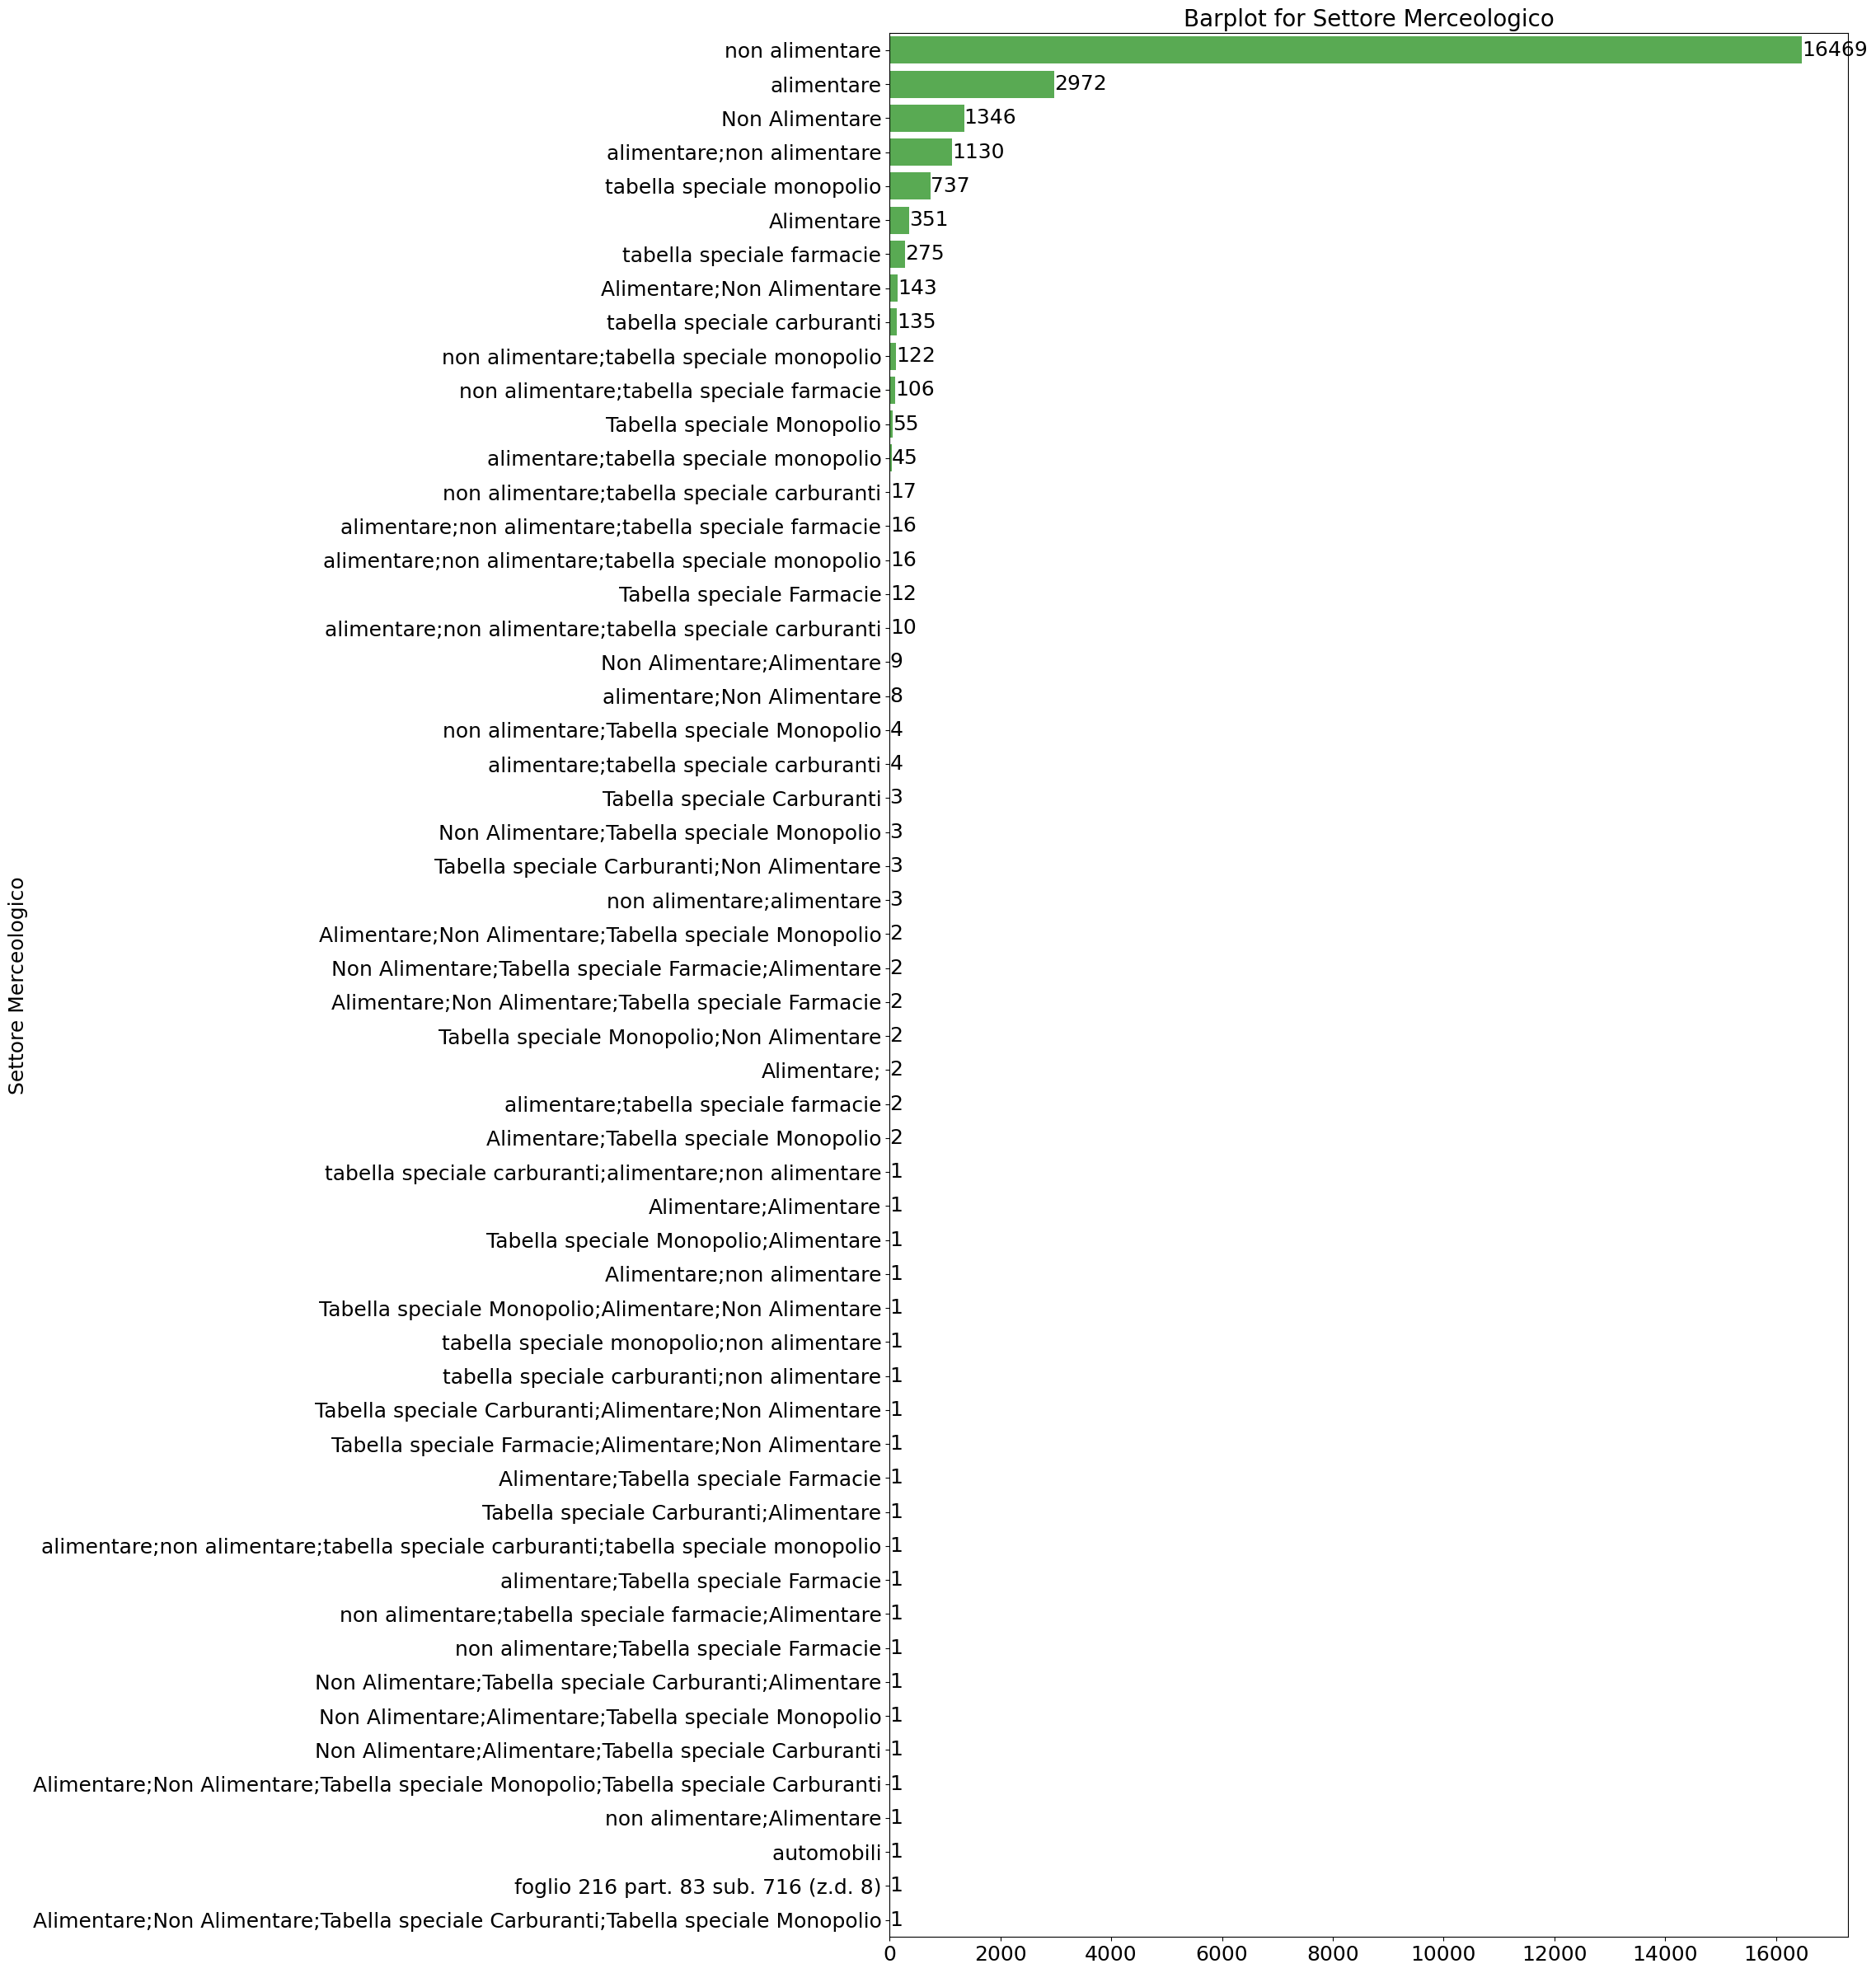

In [12]:
col ='Settore Merceologico'
plt.figure(figsize=(15,30))
ax = sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index,
             errorbar=None, order=df[col].value_counts().index, color='#4CB944')
ax.bar_label(ax.containers[0], fontsize=18)
plt.title(f"Barplot for {col}", fontsize=20)
plt.ylabel(f"{col}", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

Only values with more than 3 occurrences are shown for a better visualization

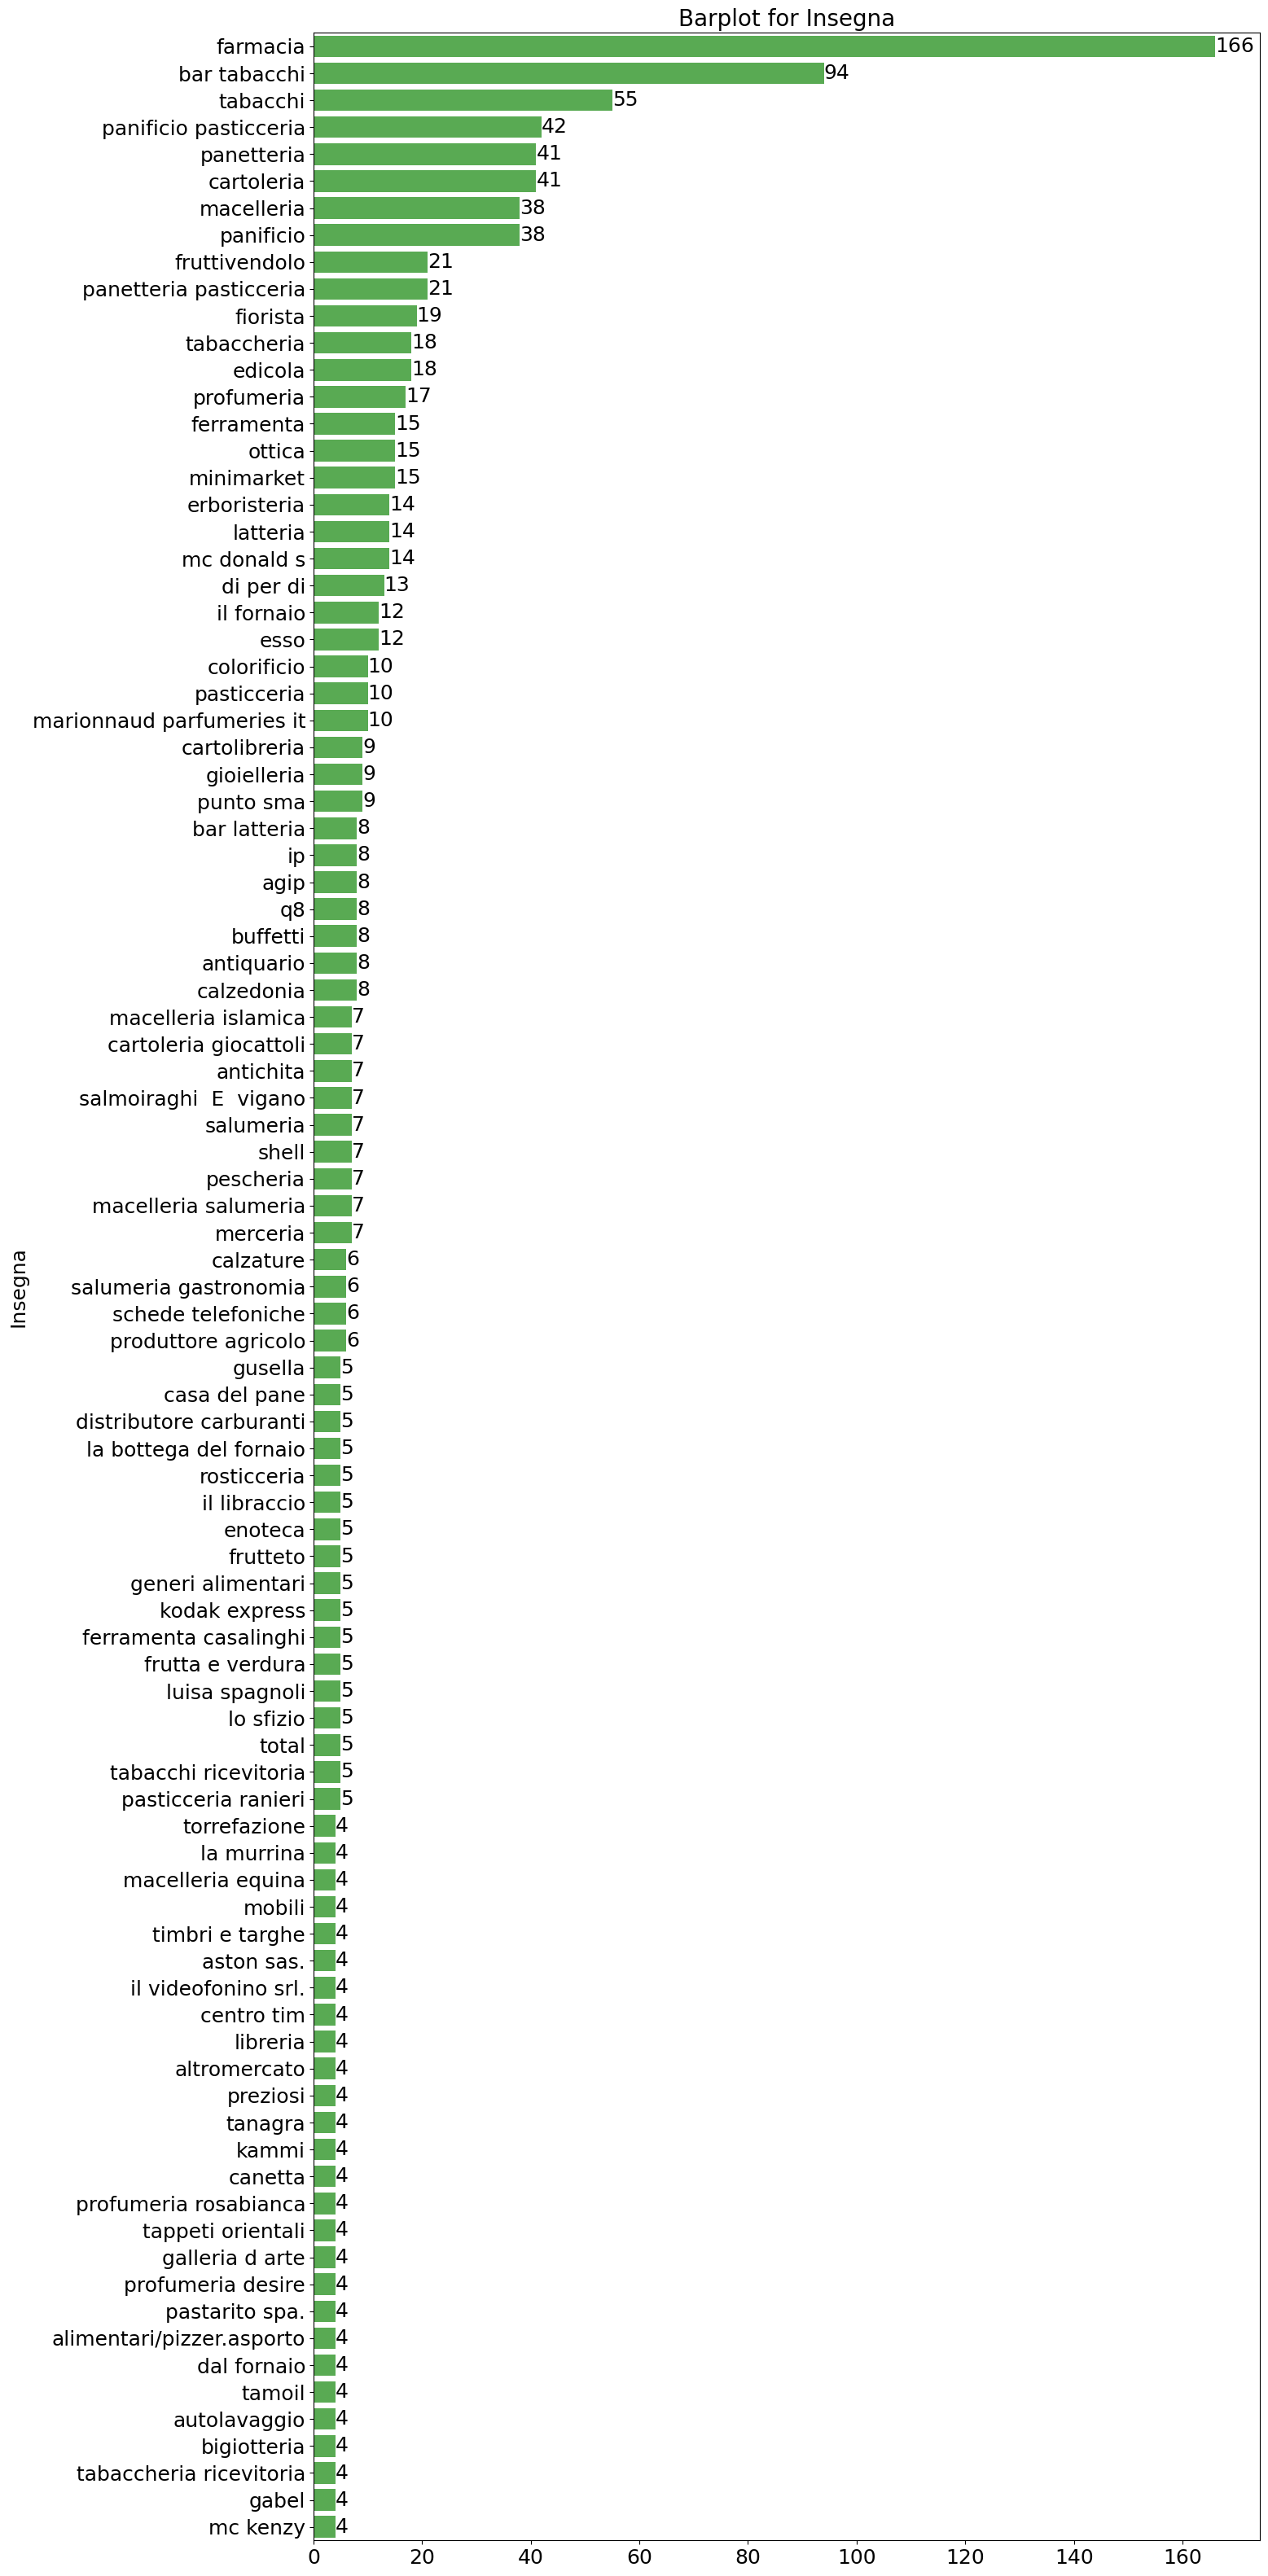

In [13]:
col ='Insegna'
# for visualization purposes
dft = df[col].value_counts() 
dft = dft[dft.values>3]
plt.figure(figsize=(15,40))
ax = sns.barplot(x=dft.values, y=dft.index,
             errorbar=None, color='#4CB944')
ax.bar_label(ax.containers[0], fontsize=18)
plt.title(f"Barplot for {col}",fontsize=20)
plt.ylabel(f"{col}", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel(f"{col}");

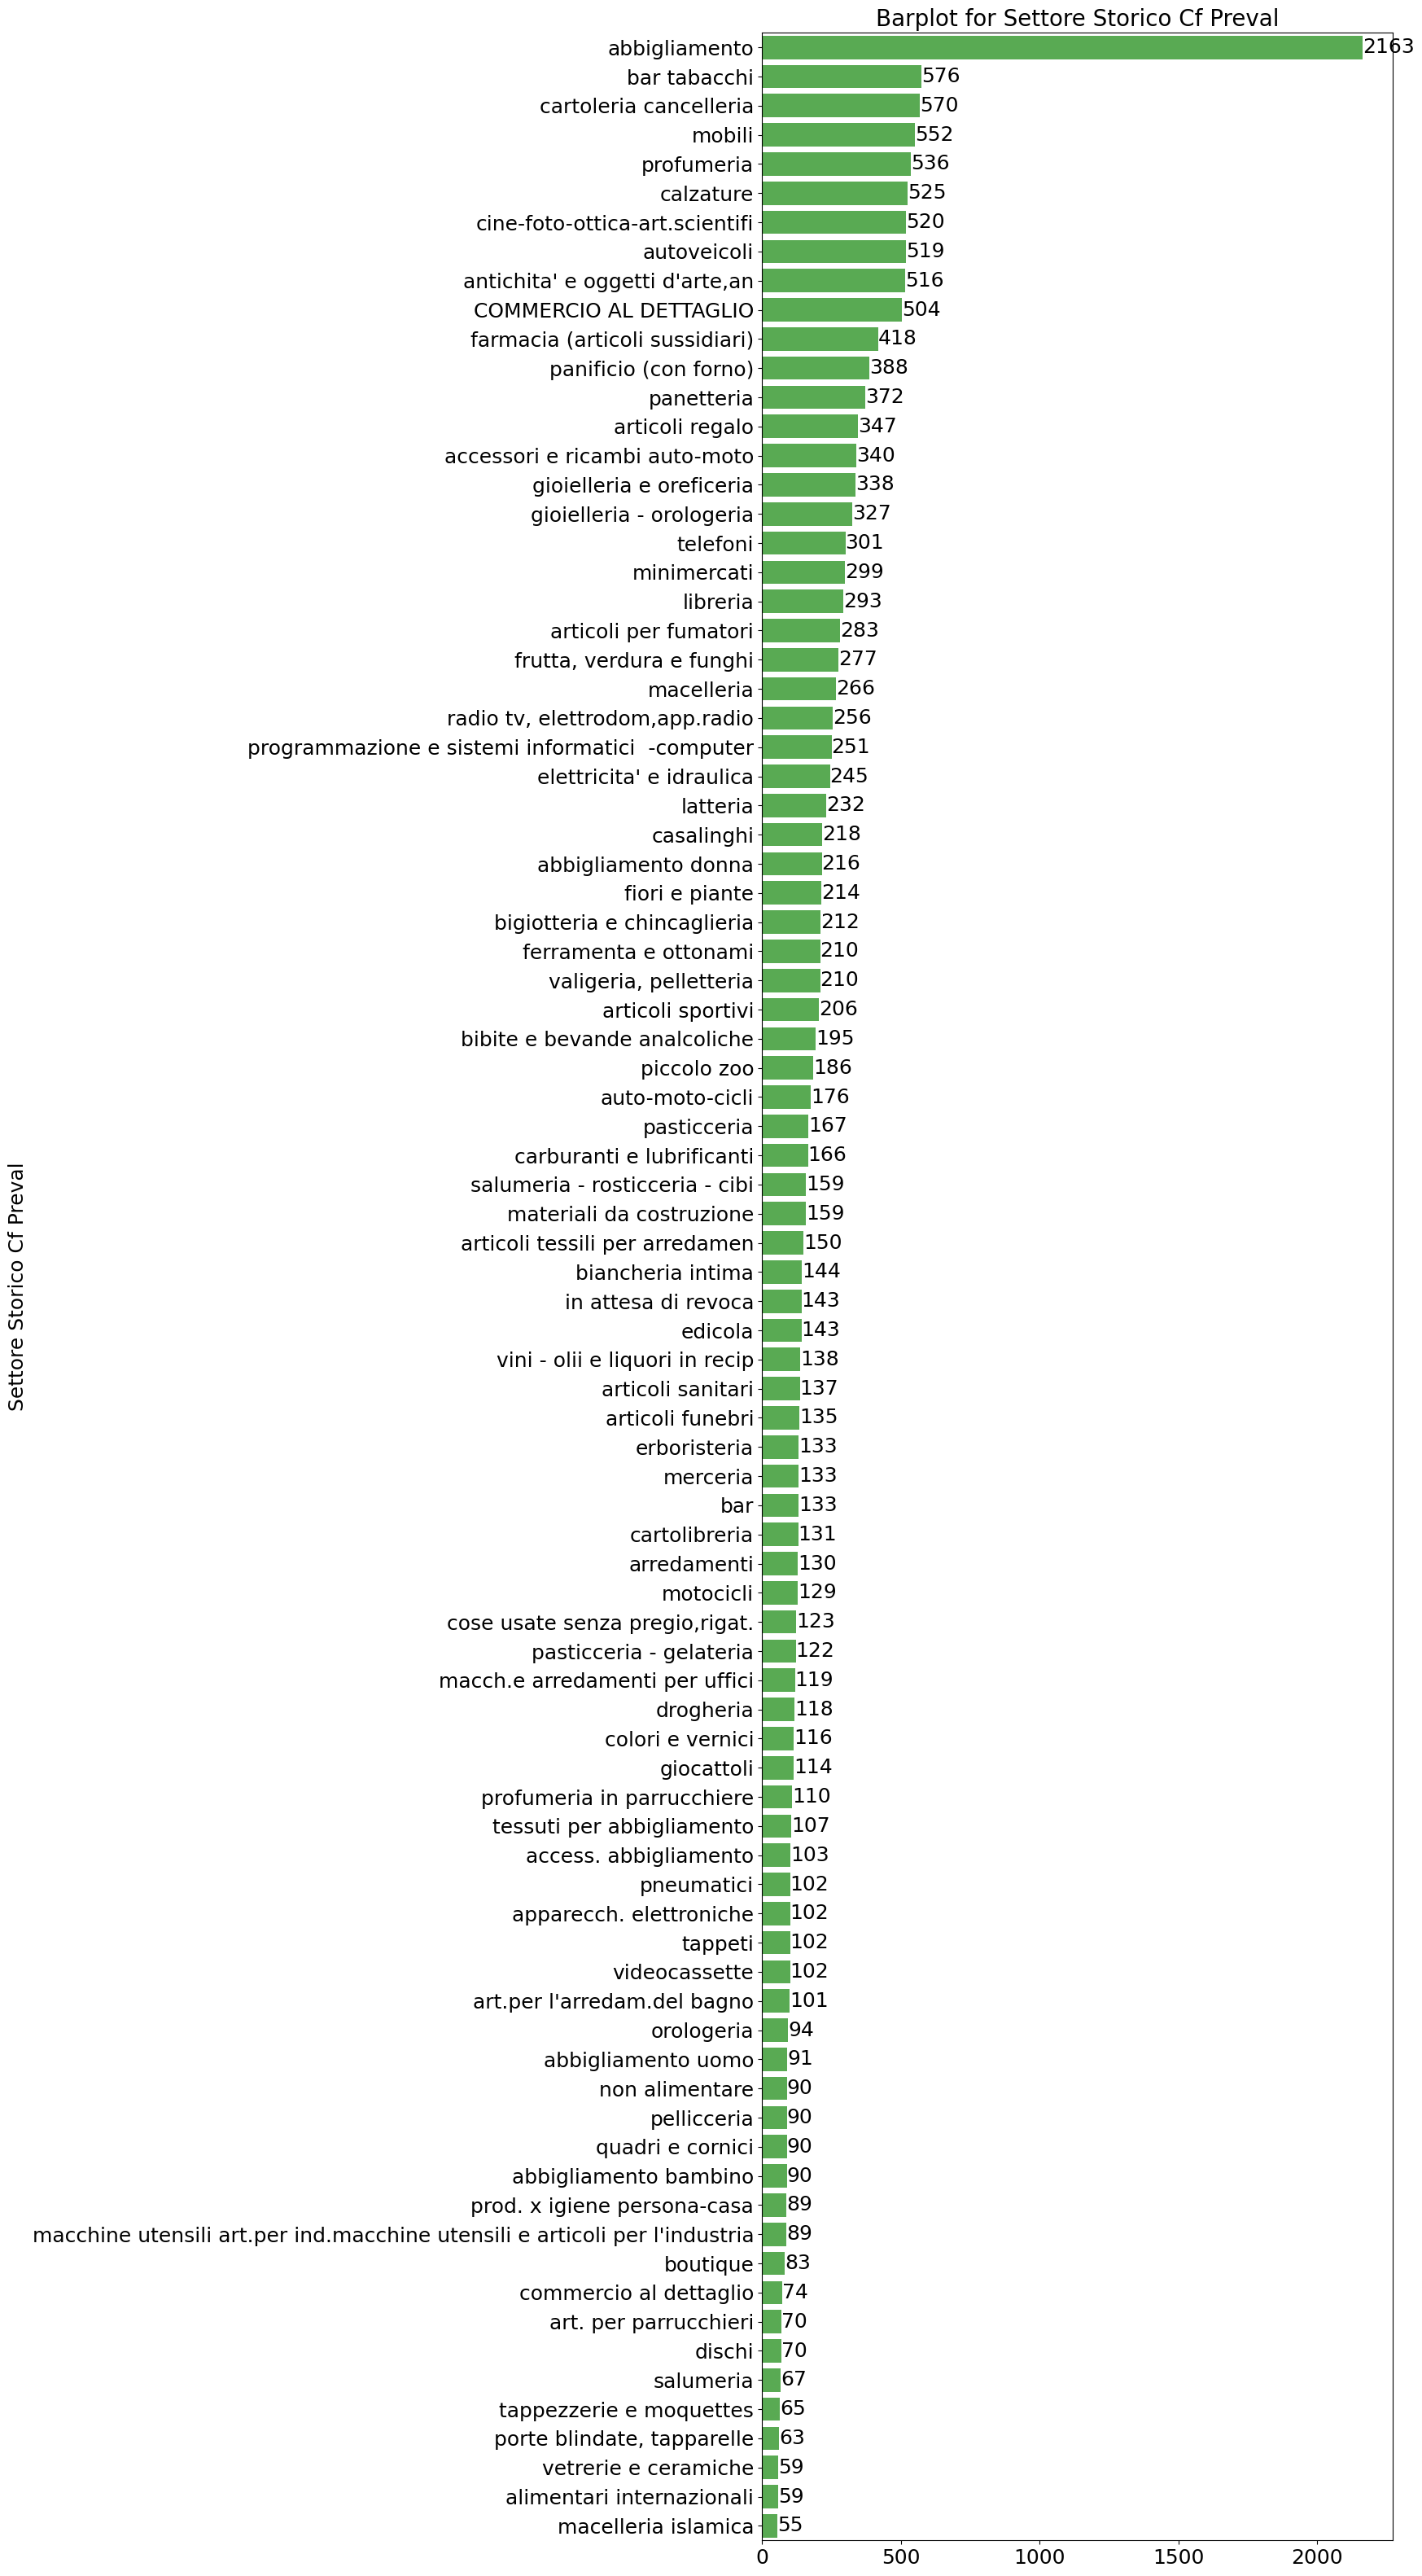

In [14]:
col ='Settore Storico Cf Preval'
# for visualization purposes
dft = df[col].value_counts() 
dft = dft[dft.values>50]
plt.figure(figsize=(10,40))
ax = sns.barplot(x=dft.values, y=dft.index,
             errorbar=None, color='#4CB944')
ax.bar_label(ax.containers[0], fontsize=18)
plt.title(f"Barplot for {col}",fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel(f"{col}",fontsize=18);

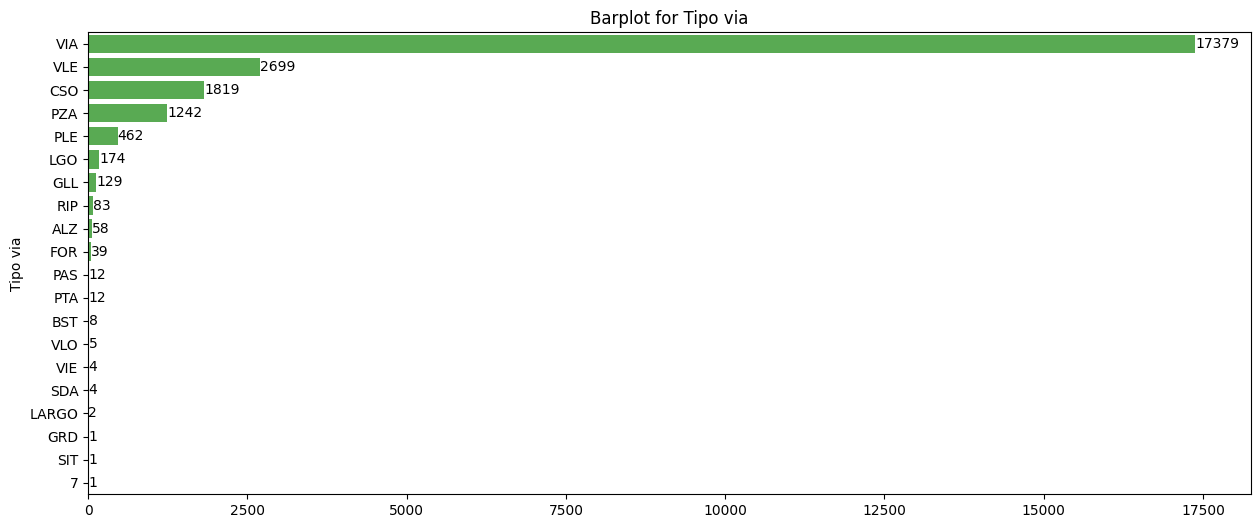

In [15]:
col ='Tipo via'
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index,
             errorbar=None, order=df[col].value_counts().index, color='#4CB944')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title(f"Barplot for {col}")
plt.ylabel(f"{col}");

## 2.3. Dependency Discovery
[$\leftarrow$ Back to contents](#Contents)

### 2.3.1. Superfici columns
[$\leftarrow$ Back to contents](#Contents)

We first of all studied correlations between numerical variables. To do so we computed both Pearson and Spearman coefficients.

Pearson's correlation spots linear correlations in the data while Spearman's correlation spots monotonic relationships in the data. p-values are computed to assess the statistical significance of the correlations.  
* Significant strong positive Pearson's correlations (`corr > 0.5`, `p-value < 0.05`) were found between:  
    - `Superficie Vendita` and `Superficie Tabelle Speciali`  
    - `Superficie Altri Usi` and `Superficie Totale`   
* Significant strong positive Spearman's correlation (`corr > 0.5`, `p-value < 0.05`) were found between:  
    - `Superficie Vendita` and `Superficie Tabelle Speciali`  
    - `Superficie Vendita` and `Superficie Totale`  
    - `Superficie Altri Usi` and `Superficie Totale`

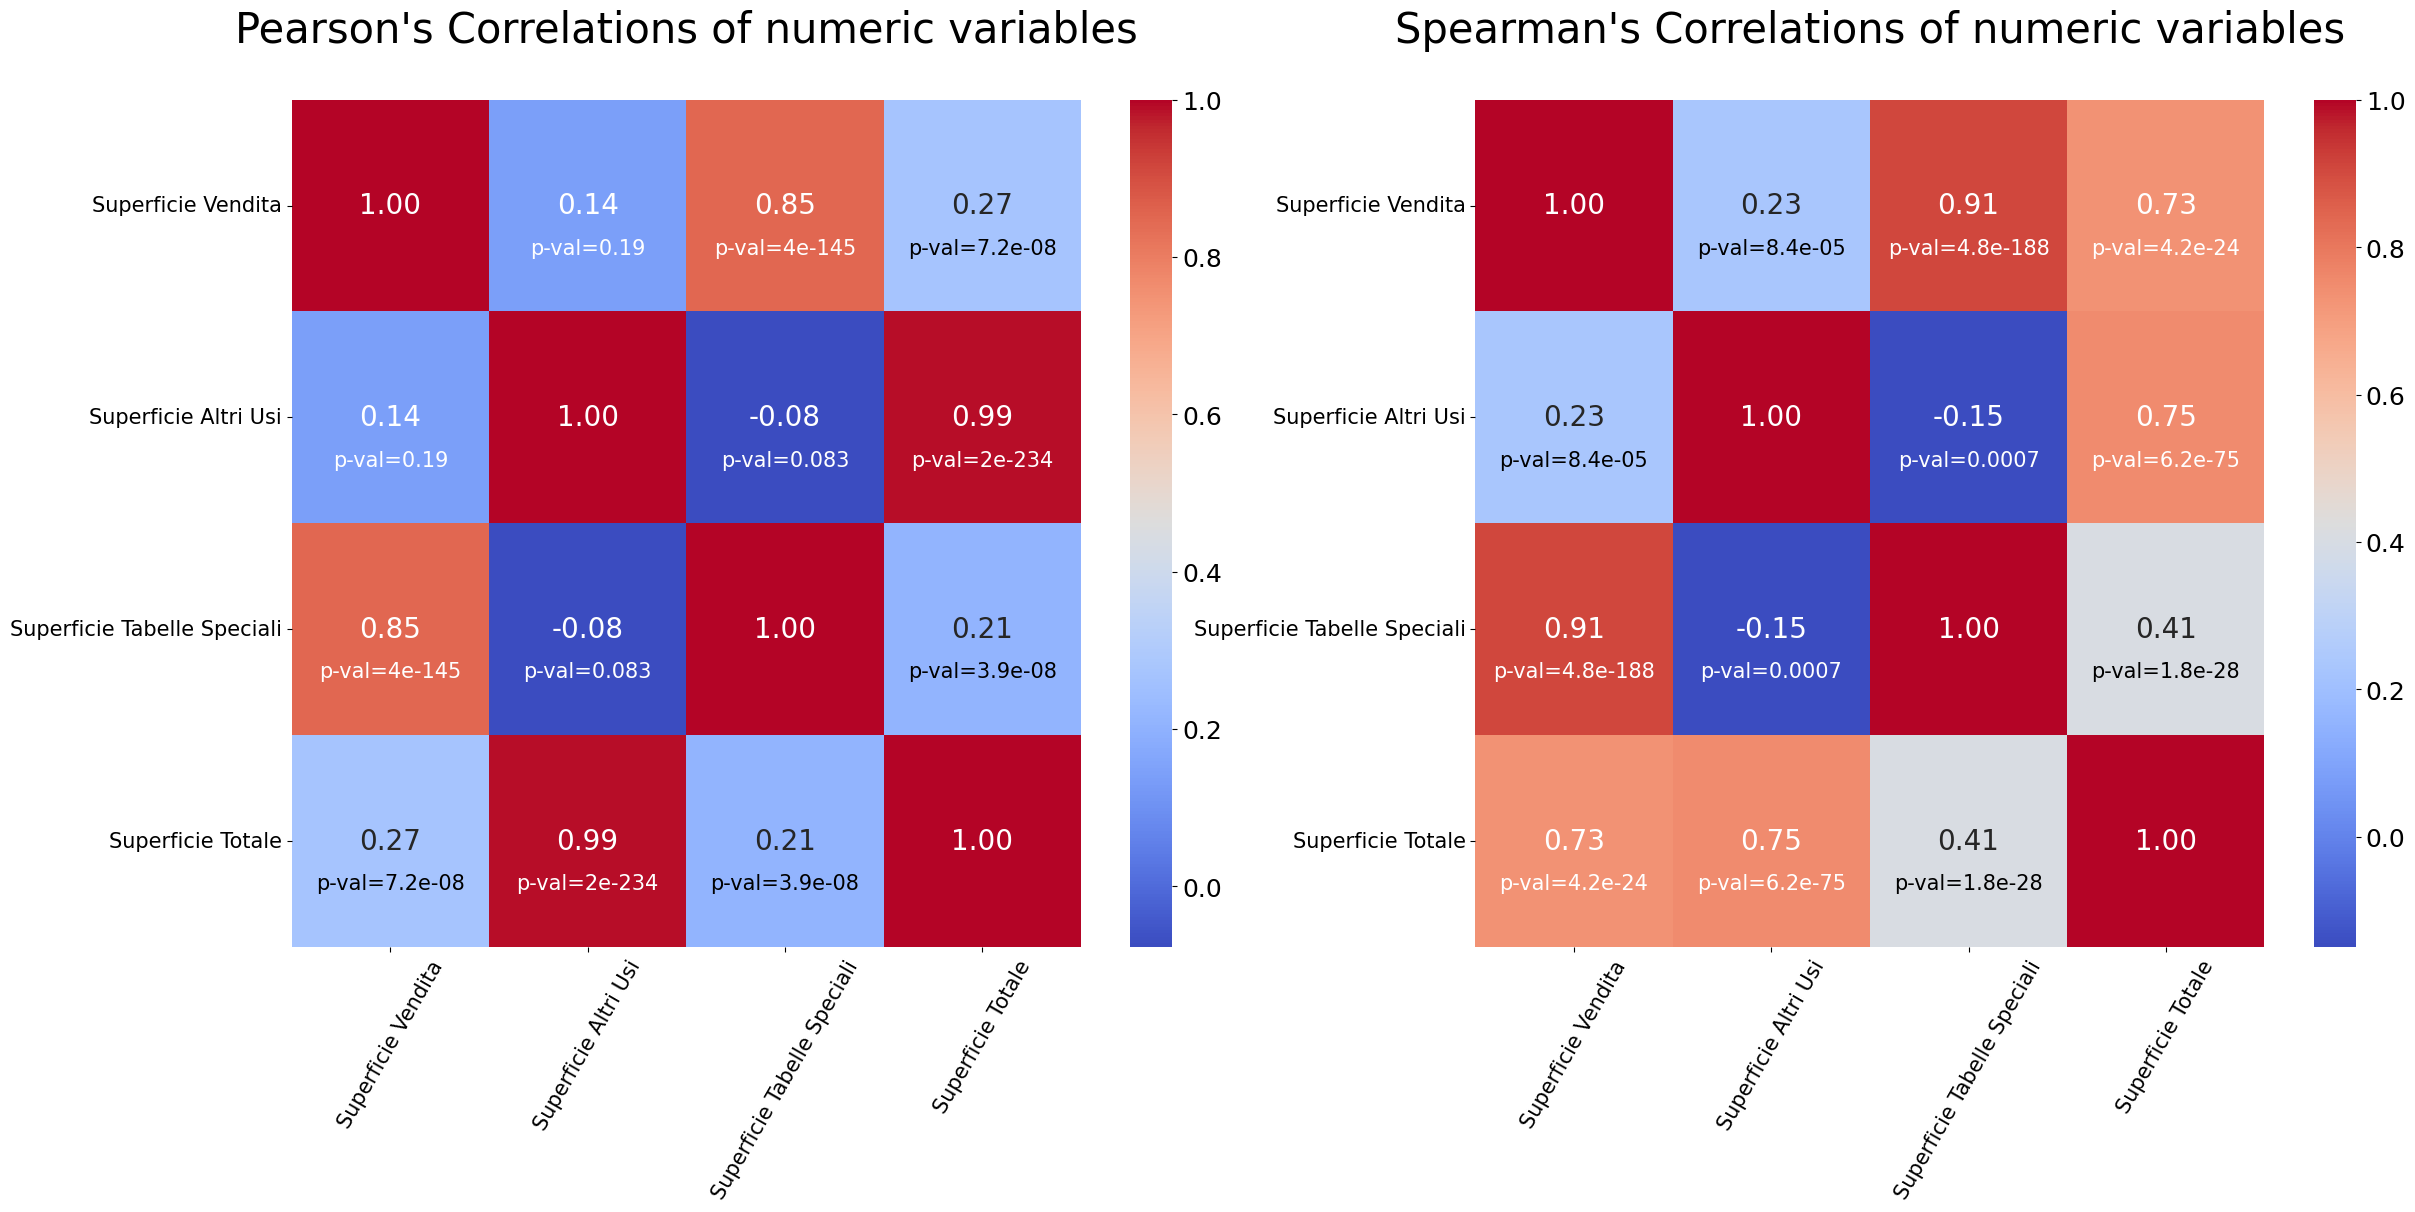

In [16]:
# Create plt figure
plt.figure(figsize=(28,11))

# Create dataframe with no nan to compute p-valeus of correlations
nnum = num.dropna()

# Create the heatmap for Pearson's correlations
corr_p = num.corr(method='pearson')

# Compute the p-values
p_values_p = pd.DataFrame(index=num.columns, columns=num.columns)
for c1 in num.columns:
    for c2 in num.columns:
        if c1 == c2:
            p_values_p.loc[c1,c2] = 0.0
        else:
            _, p_value = pearsonr(nnum[c1], nnum[c2])
            p_values_p.loc[c1, c2] = p_value

plt.subplot(1,2,1)
ax0 = sns.heatmap(corr_p, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 20})
# Normalize the data for color contrast
norm = Normalize(vmin=corr_p.min().min(), vmax=corr_p.max().max())
cmap = plt.cm.coolwarm  
for i in range(len(corr_p.columns)):
    for j in range(len(corr_p.columns)):
        if i != j: 
            color_value = norm(corr_p.iloc[i, j])
            color = cmap(color_value)

            # Decide font color based on cell background intensity
            text_color = 'white' if (color[0]*0.299 + color[1]*0.587 + color[2]*0.114) < 0.65 else 'black'
            plt.text(j + 0.5, i + 0.7, f"p-val={p_values_p.iloc[i, j]:.2g}", 
                     ha='center', va='center', fontsize=15, color=text_color)

cbar = ax0.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  
plt.title("Pearson's Correlations of numeric variables\n", fontsize=30)         
plt.xticks(fontsize=15, rotation=60)
plt.yticks(fontsize=15, rotation=0)


# Create the heatmap for Spearman's correlations
corr_s = num.corr(method='spearman')

# Compute the p-values
p_values_s = pd.DataFrame(index=num.columns, columns=num.columns)
nnum = num.dropna()
for c1 in num.columns:
    for c2 in num.columns:
        if c1 == c2:
            p_values_s.loc[c1,c2] = 0.0
        else:
            _, p_value = spearmanr(nnum[c1], nnum[c2])
            p_values_s.loc[c1, c2] = p_value

plt.subplot(1,2,2)
ax1 = sns.heatmap(corr_s, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 20})
# Normalize the data for color contrast
norm = Normalize(vmin=corr_s.min().min(), vmax=corr_s.max().max())
cmap = plt.cm.coolwarm  
for i in range(len(corr_s.columns)):
    for j in range(len(corr_s.columns)):
        if i != j: 
            color_value = norm(corr_s.iloc[i, j])
            color = cmap(color_value)

            # Decide font color based on cell background intensity
            text_color = 'white' if (color[0]*0.299 + color[1]*0.587 + color[2]*0.114) < 0.7 else 'black'
            plt.text(j + 0.5, i + 0.7, f"p-val={p_values_s.iloc[i, j]:.2g}", 
                     ha='center', va='center', fontsize=15, color=text_color)
            
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
plt.title("Spearman's Correlations of numeric variables\n", fontsize=30)         
plt.xticks(fontsize=15, rotation=60)
plt.yticks(fontsize=15, rotation=0);


Looking at the columns names, the sum of the first three should be the 4th column. The fact that Spearman spotted correlation between `Superficie Vendita` and `Superficie Totale`, and also between `Superficie Altri Usi` and `Superficie Totale` confirmed our intuition, however it was spotted also a correlation between `Superficie Vendita` and `Superficie Tabelle Speciali` which seems quite weird at first sight. We supposed that `Superficie Tabelle Speciali` could be possibly included into `Superficie Vendita`, but to better understand the relationships between the four columns, different sums of the first three are computed to discover the most likely formula used to compute Superficie Totale. 
* `Sup Tot1`: sum of the three columns
* `Sup Tot2`: sum of `Superficie Vendita` and `Superficie Altri Usi`, assuming that `Superficie Tabelle Speciali` is included in `Superficie Vendita`

In [17]:
dft = pd.DataFrame(index=df.index)
dft['Sup Tot1'] = df['Superficie Vendita'].add(df['Superficie Tabelle Speciali'], fill_value=0)
dft['Sup Tot1'] = dft['Sup Tot1'].add(df['Superficie Altri Usi'], fill_value=0)
dft['Sup Tot2'] = df['Superficie Vendita'].add(df['Superficie Altri Usi'], fill_value=0)
dft.head(5)

,Sup Tot1,Sup Tot2
0,0.0,0.0
1,21.0,21.0
2,0.0,0.0
3,120.0,120.0
4,0.0,0.0


In [18]:
print(f"Number of rows having column Superficie Tabelle Speciali not NaN: {df[df['Superficie Tabelle Speciali'].notna()].shape[0]}")
print(f"Number of rows having column Superficie Tabelle Speciali consistent with Sup Tot1 {df[(df['Superficie Tabelle Speciali'].notna()) & (df['Superficie Totale'] == dft['Sup Tot1'])].shape[0]}")
print(f"Number of rows having column Superficie Tabelle Speciali consistent with Sup Tot2 {df[(df['Superficie Tabelle Speciali'].notna()) & (df['Superficie Totale'] == dft['Sup Tot2'])].shape[0]}")

Number of rows having column Superficie Tabelle Speciali not NaN: 1127
Number of rows having column Superficie Tabelle Speciali consistent with Sup Tot1 16
Number of rows having column Superficie Tabelle Speciali consistent with Sup Tot2 660


Now the consistency of the `Sup Tot1` and `Sup Tot2` is evaluated for rows having `Superficie Tabelle Speciali` not `NaN`. This aims to understand if Superficie Tabelle Speciali is included in Superficie Vendita or not. 

For rows with Superficie Tabelle Speciali not NaN
* `Sup Tot1` was consistent with Superficie Totale in only `16` rows
* `Sup Tot2` was consistent with Superficie Totale for `660` rows (more than half of the total)  

For this reason, `Superficie Tabelle Speciali` is assumed to be included in `Superficie Vendita`.

### 2.3.2. Ubicazione, Tipo via, Civico, ZD
[$\leftarrow$ Back to contents](#Contents)  
From a visual inspection of the dataset, the column `Ubicazione` seems to contain the information of the columns `Tipo via`, `Via`, `Civico`, `ZD`.

In [19]:
cnt = 0
for i, r in df.iterrows():
    ub = r['Ubicazione']
    tipo = r['Tipo via']
    via = r['Via']
    civ = r['Civico']
    zd = r['ZD']

    # check of Ubicazione contains other columns
    if isinstance(ub,str):
        if isinstance(tipo,str):
            if str(tipo) in ub:
                cnt = cnt + 0.25
        if isinstance(via,str):
            if str(via) in ub:
                cnt = cnt + 0.25
        if isinstance(civ,str):
            if (str(civ) in ub):
                cnt = cnt + 0.25
        if isinstance(zd,str):
            if (str(zd) in ub):
                cnt = cnt + 0.25

print(f"Percentage of rows satisfying inclusion dependency: {cnt/n_rows}")

Percentage of rows satisfying inclusion dependency: 0.9770570931388797


### 2.3.3. Association rules
[$\leftarrow$ Back to contents](#Contents)  
Other associations are spotted using `fpgrowth`.

In [20]:
def mine_association_rules(df,lhs,rhs,min_sup=0.5,min_conf=0.8,num_itemsets=2):

    """This function mines for association rules between arbitrary number of columns of a dataframe using fpgrowth algorithm to extract frequent itemsets."""
    
    #Put all items of each transactions into a list
    #df = df.dropna() # it makes everything explode apparently
    records = []
    for i in range(0,df.shape[0]):
        if type(lhs) == list:
            st1 = df.loc[i,lhs].str.cat(sep = ' ')
        else:
            st1 = str(df.loc[i,lhs])
        
        if type(rhs) == list:
            st2 = df.loc[i,rhs].str.cat(sep=' ')
        else:
            st2 = str(df.loc[i,rhs])

        records.append([(st1,0),(st2,1)])
    
    ### ASSOCIATION RULES MINING IN 3 STEPS ###

    # # 0 - generate an encoding of the dataset
    TE = TransactionEncoder()
    array = TE.fit(records).transform(records)
    array_df = pd.DataFrame(array,columns=TE.columns_)

    # 1 - generate the frequent itemset: set of transactions with support >= min_sup
    freq_itemset = fpgrowth(array_df, min_support=min_sup, use_colnames=True)
    freq_itemset['length'] = freq_itemset['itemsets'].apply(lambda x: len(x)) # additional column for length of itemset

    if not freq_itemset.empty:
        # 2 - generate rules: set of transactions having confidence >= min_conf
        rules = association_rules(freq_itemset, num_itemsets=num_itemsets, metric='confidence', min_threshold=min_conf)
        rules = rules[rules['lift']>1] # filter to keep only interesting rules

        # # clean up a bit the formats
        rules['antecedents'] = rules['antecedents'].apply(lambda x : list(x)[0])
        rules['consequents'] = rules['consequents'].apply(lambda x : list(x)[0])
        rules['antecedents'] = rules['antecedents'].apply(lambda x : tuple((str(lhs),x[0])) if x[1]==0 else tuple((str(rhs),x[0])))
        rules['consequents'] = rules['consequents'].apply(lambda x : tuple((str(lhs),x[0])) if x[1]==0 else tuple((str(rhs),x[0])))

        return pd.DataFrame([f"{x[0]} : {x[1]} => {y[0]} : {y[1]}" for x, y in rules[['antecedents','consequents']].values],columns=['rule'])
    else:
        return pd.DataFrame()



**Codice Via and ZD**

195 rules were found, indicating that each `Codice via` is associated with only one `ZD`. The same goes for the association between `Via` and `ZD`, in fact `Codice via` should be univocally associated to the `Via`. Consequeltly, the number of rules found for the two associations is approximately the same.

In [21]:
codice_zd_rules = mine_association_rules(df,lhs='Codice via',rhs='ZD',min_sup=0.001)
codice_zd_rules.value_counts()

rule                       
Codice via : 1 => ZD : 1       1
Codice via : 591 => ZD : 1     1
Codice via : 5164 => ZD : 1    1
Codice via : 5198 => ZD : 5    1
Codice via : 5200 => ZD : 5    1
                              ..
Codice via : 236 => ZD : 1     1
Codice via : 238 => ZD : 1     1
Codice via : 2390 => ZD : 2    1
Codice via : 2400 => ZD : 3    1
Codice via : 7478 => ZD : 8    1
Name: count, Length: 195, dtype: int64

**Via and ZD**

In [22]:
via_zd_rules = mine_association_rules(df,lhs='Via',rhs='ZD',min_sup=0.001)
via_zd_rules.value_counts()

rule                                            
Via : ABRUZZI => ZD : 3                             1
Via : PIERLUIGI GIOVANNI DA PALESTRINA => ZD : 3    1
Via : PISACANE CARLO => ZD : 3                      1
Via : PLINIO CAIO SECONDO => ZD : 3                 1
Via : POLIZIANO => ZD : 8                           1
                                                   ..
Via : GIAMBELLINO => ZD : 6                         1
Via : GIOIA MELCHIORRE => ZD : 2                    1
Via : GORIZIA => ZD : 6                             1
Via : GOVONE GIUSEPPE => ZD : 8                     1
Via : ZURETTI GIANFRANCO => ZD : 2                  1
Name: count, Length: 196, dtype: int64

**Insegna and Settore Storico Cf Preval**  

Most or the rules found are correlated with NaN values, especially for Insegna. This may indicate that shops associated with a particular Settore Storico don't have shop sign or it maybe it was not recorded.

In [23]:
sett_merc_sett_storico_rules = mine_association_rules(df,lhs='Insegna',rhs='Settore Storico Cf Preval',min_sup=0.001)
sett_merc_sett_storico_rules.value_counts()

rule                                                                                                                        
Insegna : bar tabacchi => Settore Storico Cf Preval : bar tabacchi                                                              1
Insegna : cartoleria => Settore Storico Cf Preval : cartoleria cancelleria                                                      1
Settore Storico Cf Preval : tabella speciale monopolio => Insegna : nan                                                         1
Settore Storico Cf Preval : quadri e cornici => Insegna : nan                                                                   1
Settore Storico Cf Preval : non alimentare => Insegna : nan                                                                     1
Settore Storico Cf Preval : nan => Insegna : nan                                                                                1
Settore Storico Cf Preval : macchine utensili art.per ind.macchine utensili e articoli per l'in

**Insegna and Settore Merceologico**

In [24]:
sett_merc_insegna_rules = mine_association_rules(df,lhs='Insegna',rhs='Settore Merceologico',min_sup=0.001)
sett_merc_insegna_rules.value_counts()

rule                                                                       
Insegna : bar tabacchi => Settore Merceologico : tabella speciale monopolio    1
Insegna : cartoleria => Settore Merceologico : non alimentare                  1
Insegna : farmacia => Settore Merceologico : tabella speciale farmacie         1
Insegna : macelleria => Settore Merceologico : alimentare                      1
Insegna : panetteria => Settore Merceologico : alimentare                      1
Insegna : panificio => Settore Merceologico : alimentare                       1
Insegna : panificio pasticceria => Settore Merceologico : alimentare           1
Insegna : tabacchi => Settore Merceologico : tabella speciale monopolio        1
Settore Merceologico : Alimentare => Insegna : nan                             1
Settore Merceologico : Alimentare;Non Alimentare => Insegna : nan              1
Settore Merceologico : Non Alimentare => Insegna : nan                         1
Settore Merceologico : nan => Ins

**Settore Merceologico and Settore Storico Cf Preval**

24 rules are found with a minimum support of 0.01 (10 times higher than the one used for spotting rules in the previous cases). This is an interesting result, especially considering that no data wrangling was applied.

In [25]:
sett_merc_sett_storico_rules = mine_association_rules(df,lhs='Settore Merceologico',rhs='Settore Storico Cf Preval',min_sup=0.01)
sett_merc_sett_storico_rules.value_counts()

rule                                                                                                                
Settore Merceologico : tabella speciale farmacie => Settore Storico Cf Preval : farmacia (articoli sussidiari)          1
Settore Storico Cf Preval : abbigliamento => Settore Merceologico : non alimentare                                      1
Settore Storico Cf Preval : radio tv, elettrodom,app.radio => Settore Merceologico : non alimentare                     1
Settore Storico Cf Preval : programmazione e sistemi informatici  -computer => Settore Merceologico : non alimentare    1
Settore Storico Cf Preval : profumeria => Settore Merceologico : non alimentare                                         1
Settore Storico Cf Preval : panificio (con forno) => Settore Merceologico : alimentare                                  1
Settore Storico Cf Preval : panetteria => Settore Merceologico : alimentare                                             1
Settore Storico Cf Preval : m

In [26]:
len(sett_merc_sett_storico_rules)

22

# 3. DQ assesment
[$\leftarrow$ Back to contents](#Contents)

The 4 main dimensions to evaluate are:
- completeness
- accuracy (can't evaluate since there's no ground truth)
- timeliness
- consistency

## 3.1. Cardinalities
[$\leftarrow$ Back to contents](#Contents)

In [27]:
dq_assesment_sc = pd.DataFrame(columns=df.columns,index=['Uniqueness','Distinctness','Constancy'])

for col in df.columns:
    uniqueness = sc_analysis.loc['Cardinality',col]/n_rows
    distinctness = sc_analysis.loc['Cardinality',col]/sc_analysis.loc['Actual',col]
    mode = df[col].mode()[0]
    constancy = df[col].value_counts()[mode] / n_rows

    dq_assesment_sc.loc['Uniqueness', col] = uniqueness
    dq_assesment_sc.loc['Distinctness', col] = distinctness
    dq_assesment_sc.loc['Constancy', col] = constancy
    
dq_assesment_sc


,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
Uniqueness,0.00232,0.231314,0.700489,0.000829,0.096578,0.015993,0.097282,0.000414,0.09231,0.010358,0.018147,0.004848,0.026599
Distinctness,0.00233,0.798827,0.700518,0.000829,0.096582,0.016435,0.09729,0.000414,0.092437,0.010371,0.048462,0.103815,0.026639
Constancy,0.682342,0.006878,0.000953,0.720045,0.01214,0.062314,0.01214,0.237488,0.089617,0.051583,0.024196,0.004267,0.042551


## 3.2. Completeness
[$\leftarrow$ Back to contents](#Contents)  

In [28]:
completeness = df.notnull().sum().sum()/(n_rows*n_cols)
print(f"COMPLETENESS: {completeness}")

COMPLETENESS: 0.8211544835674766


## 3.3. Consistency
[$\leftarrow$ Back to contents](#Contents)  

To evaluate dataset consistency, both the dependencies that were spotted visually and the dependencies analyzed by association rules are checked for each row in the dataset. A dataset containing rows with inconsistencies is saved to be studied later, after data wrangling. A column named `Reason` is added to the `df_inconsistencies` to keep trace of the checks that failed during consistency assessment.

In [29]:
consistency_sum = 0
for i, r in df.iterrows():
    ub = r['Ubicazione']
    tipo = r['Tipo via']
    via = r['Via']
    civ = r['Civico']
    codvia = r['Codice via']
    zd = r['ZD']
    reason = ''

    # check of Ubicazione contains other columns
    if isinstance(ub,str):
        if isinstance(tipo,str):
            if str(tipo) in ub:
                consistency_sum = consistency_sum + 0.125
        if isinstance(via,str):
            if str(via) in ub:
                consistency_sum = consistency_sum + 0.125
        if isinstance(civ,str):
            if (str(civ) in ub):
                consistency_sum = consistency_sum + 0.125
        if isinstance(zd,str):
            if (str(zd) in ub):
                consistency_sum = consistency_sum + 0.125

    # Z.D. has to be a zone number
    if zd in {'1','2','3','4','5','6','7','8','9'}:
        consistency_sum = consistency_sum + 0.125

    # check of rule: Codice via => ZD
    rule_values = codice_zd_rules['rule'].str.extract(r'[A-Za-z]+\s\:\s(.*)\s\=\>\s[A-Za-z]+\s\:\s(.*)',expand=True)
    value = rule_values[rule_values[0]==zd].reset_index()
    if not value.empty:
        if zd == value[1][0]:
            consistency_sum = consistency_sum + 0.125

    sv = r['Superficie Vendita']
    sa = r['Superficie Altri Usi']
    ss = r['Superficie Tabelle Speciali']
    st = r['Superficie Totale']
    # check sum of coherency of superificie filds
    if (sv+sa) == st:
        consistency_sum = consistency_sum + 0.125
    
    # check of inclusion of Superficie Tabelle Speciali in Superficie Vendita
    if (sv+ss) > st-sa:
        consistency_sum = consistency_sum + 0.125 

In [30]:
consistency = consistency_sum/n_rows
print(f"CONSISTENCY: {consistency}")

CONSISTENCY: 0.6912910175671196


# 4. Data Wrangling
[$\leftarrow$ Back to contents](#Contents)

In [31]:
# Create a copy of the original df
df_original = df.copy()

## 4.1. Settore Merceologico
[$\leftarrow$ Back to contents](#Contents)

1. All values of the column are put in lower case
2. Some entries have multiple values in the column `Settore Merceologico` separated with `;`. Therefore, the column is split into `Settore Merceologico Primario` and `Settore Merceologico Secondario` (which may include multiple values).
3. For `Settore Merceologico secondario`, the separator for multiple values is changed from `;` to `, `
4. The column `Settore Merceologico` is dropped and the two new columns are moved to position `0` and `1`.

In [32]:
# Put all values in lower case
df['Settore Merceologico'] = df['Settore Merceologico'].str.lower()

# Add additional columns for Settore Merceologico Principale and Settore Merceologico Secondario

df[['Settore Merceologico Principale', 'Settore Merceologico Secondario']] = (
    df['Settore Merceologico']
    .str.split(';', n=1, expand=True)
    .apply(lambda x: [x[0], x[1] if len(x) > 1 else np.nan], axis=1, result_type='expand')
)
df['Settore Merceologico Secondario'] = df['Settore Merceologico Secondario'].astype(object).replace({None: np.nan})
df['Settore Merceologico Secondario'] = df['Settore Merceologico Secondario'].str.replace(';',', ')
df[df['Settore Merceologico Secondario']==''] = np.nan


# Drop the origilal column Settore Merceologico
df = df.drop(columns='Settore Merceologico')

# Insert the two new columns in position 0 and 1
df.insert(0,'Settore Merceologico Principale', df.pop('Settore Merceologico Principale'))
df.insert(1, 'Settore Merceologico Secondario', df.pop('Settore Merceologico Secondario'))
df.iloc[5000:5010]


,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
5000,non alimentare,NaN,NaN,CSO DI PORTA NUOVA 1ø piano num.046/b; (z.d. 1),CSO,DI PORTA NUOVA,NaN,1044,1,"antichita' e oggetti d'arte,an",200.0,40.0,NaN,240.0
5001,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 19 ; isolato:009; access...,CSO,DI PORTA NUOVA,19,1044,1,articoli sanitari,20.0,506.0,NaN,526.0
5002,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 32 ; isolato:088; access...,CSO,DI PORTA NUOVA,32,1044,1,articoli funebri,32.0,NaN,NaN,32.0
5003,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 32 ; isolato:088; access...,CSO,DI PORTA NUOVA,32,1044,1,coltelleria,22.0,6.0,NaN,28.0
5004,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 34 (z.d. 1),CSO,DI PORTA NUOVA,34,1044,1,abbigliamento,127.0,NaN,NaN,329.0
5005,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 34 (z.d. 1),CSO,DI PORTA NUOVA,34,1044,1,autovetture,36.0,NaN,NaN,74.0
5006,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 38 ;cso di porta romana ...,CSO,DI PORTA NUOVA,38,1044,1,abbigliamento,60.0,20.0,NaN,80.0
5007,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 38 ; isolato:088; access...,CSO,DI PORTA NUOVA,38,1044,1,galleria d'arte,70.0,NaN,NaN,70.0
5008,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 38 (z.d. 1),CSO,DI PORTA NUOVA,38,1044,1,vendita oggetti d'arte,150.0,60.0,NaN,210.0
5009,non alimentare,NaN,NaN,CSO DI PORTA NUOVA N. 46 ; isolato:010; access...,CSO,DI PORTA NUOVA,46,1044,1,articoli funebri,37.0,NaN,NaN,37.0


## 4.2. Insegna
[$\leftarrow$ Back to contents](#Contents)

1. Values were put to lower case
2. Everything different from alphanumeric characters or `.` was replaced with ` `.

In [33]:
# Put all values to loewer case
df['Insegna'] = df['Insegna'].str.lower()

# Replace not alphanumeric characters(or stop) with spaces.
df['Insegna'] = df['Insegna'].str.replace('[^(\.\w)]',' ',regex=True)

df.iloc[100:105]

<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
C:\Users\sarar\AppData\Local\Temp\ipykernel_4436\3033637803.py:5: DeprecationWarning: invalid escape sequence '\.'
  df['Insegna'] = df['Insegna'].str.replace('[^(\.\w)]',' ',regex=True)


,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
100,NaN,NaN,produttore agricolo,VIA RIPAMONTI GIUSEPPE N. 549 7.4.08 tras.set....,VIA,RIPAMONTI GIUSEPPE,549,4066,5,fiori e piante,0.0,NaN,NaN,0.0
101,NaN,NaN,produttore agricolo,VIA SELVANESCO N. 25 7.4.08 tras.set. agricolt...,VIA,SELVANESCO,25,4350,5,"frutta, verdura e funghi",0.0,NaN,NaN,0.0
102,NaN,NaN,produttore agricolo,VLE TROYA CARLO N. 23 7.4.08 tras.sett.agricol...,VLE,TROYA CARLO,23,5140,6,"frutta, verdura e funghi",0.0,NaN,NaN,0.0
103,NaN,NaN,specialita regionali,VIA SAMMARTINI GIOVANNI BATTISTA N. 69 ; isola...,VIA,SAMMARTINI GIOVANNI BATTISTA,69,1202,2,panificio (con forno),18.0,NaN,NaN,18.0
104,NaN,NaN,tessuti,VIA MUZIO SCEVOLA N. 4 ; isolato:115; accesso:...,VIA,MUZIO SCEVOLA,4,2663,3,tessuti per abbigliamento,18.0,NaN,NaN,18.0


## 4.3. Ubicazione
[$\leftarrow$ Back to contents](#Contents)

From a visual inspection it was noted that the column Ubicazione contained some information already present in other columns and in some cases some additional information. Information is usually separated by `;`. This column may be useful for handling missing values by performing data imputation. For this reason, the information in this column is saved in a temporary `DataFrame` split into:
* `Tipo via tmp`
* `Via tmp`
* `Civico tmp`
* `ZD tmp ` 

Of a note, two columns not present in the original `DataFrame` emerged:
* `Accesso`
* `Isolato`
* `Website`

Additional information was put into the column `Altre info`.  
The columns of the temporary DataFrame are concatenated to the complete `DataFrame` next to the column `ZD`. In the end, the column Ubicazione is dropped from the complete `DataFrame`.

In [34]:
# Create the temporary DataFrame
dft = pd.DataFrame()

# Extract Tipo via
dft['Tipo via tmp'] = df['Ubicazione'].str.extract('([A-Z]+ )',expand=True)
dft['Tipo via tmp'] = dft['Tipo via tmp'].str.strip() # Remove spaces at the begin and end of the string

# Extract Via
dft['Via tmp'] = df['Ubicazione'].str.extract(r'(?:^[A-Z]+ )([A-Z\.\'\s]+[A-MO-Z\']+[\.N]*)(?= N\.|num\.|civ\.|civico|\s?[a-z]|\s?\W\d)', expand=True)
dft['Via tmp'] = dft['Via tmp'].str.strip() # Remove spaces at the begin and end of the string

# Extract Civico
dft['Civico tmp'] = df['Ubicazione'].str.extract(r'(?:N\.|num\.|civ\.|civico)(\s?[\w/\\]+)', expand=True)
dft['Civico tmp'] = dft['Civico tmp'].str.strip() # Remove spaces at the begin and end of the string
dft['Civico tmp'] = dft['Civico tmp'].str.upper() # Put all characters to uppercase
dft['Civico tmp'] = dft['Civico tmp'].replace(r'^0+', '', regex=True) # Remove all the zeros at the beginning of the string
dft['Civico tmp'] = dft['Civico tmp'].str.replace(r'(\d)([a-zA-Z])', r'\1/\2', regex=True) # Add a / before letters to have uniform strings
dft.loc[dft['Civico tmp'] == '','Civico tmp'] = np.nan # If the string is empty, replace with NaN

# Extract ZD
dft['ZD tmp'] = df['Ubicazione'].str.extract('\(z.d. (\d)\)',expand=True)
dft['ZD tmp'] = dft['ZD tmp'].str.strip() # Remove spaces at the begin and end of the string

# Extract Accesso
dft['Accesso'] = df['Ubicazione'].str.extract(r'accesso:([^;]*)')
dft['Accesso'] = dft['Accesso'].str.strip() # Remove spaces at the begin and end of the string
dft['Accesso'] = dft['Accesso'].replace(r'^accesso ', '', regex=True) # Remove the word accesso from the beginning of the string

# Extract Isolato
dft['Isolato'] = df['Ubicazione'].str.extract(r'isolato:([^;]*)')
dft['Isolato'] = dft['Isolato'].str.strip() # Remove spaces at the begin and end of the string
dft['Isolato'] = dft['Isolato'].replace(r'^0+', '', regex=True) # Remove all the zeros at the beginning of the string

# Extract Website
dft['Website'] = df['Ubicazione'].str.extract(r'(www[\w\.-]+)', expand=True)
dft['Website'] = dft['Website'].str.strip() # Remove spaces at the begin and end of the string

# Extract Altre info
dft['Altre info'] = df['Ubicazione'].replace({
    r'\(z.d. (\d)\)': '',  # Remove ZD info
    r'accesso:([^;]*)': '', # Remove Accesso info
    r'isolato:([^;]*)': '',  # Remove Isolato info
    r'([A-Z\.\'\s]+[A-Z\']+)(?= N\.|num\.|civ\.|civico|\s?[a-z]|\s?\W\d)': '', # remove Via info
    r'(N\.|num\.|civ\.|civico)(\s?[\w/\\]+)': '', # remove Civico info
    r'(www[\w\.-]+)': ''  # Remove Website info
}, regex=True)
dft['Altre info'] = dft['Altre info'].str.strip() # Strip any extra spaces from the remaining string
dft['Altre info'] = dft['Altre info'].replace(r'^[; ]+|[; ]+$', '', regex=True)  # Remove leading/trailing ; and spaces
dft['Altre info'] = dft['Altre info'].replace(r';+', '', regex=True)  # Replace multiple semicolons with a single one

# Set the rows with empty Altre info as nan
dft.loc[dft['Altre info'] == '','Altre info'] = np.nan

dft.head(20)

<>:21: DeprecationWarning: invalid escape sequence '\('
<>:21: DeprecationWarning: invalid escape sequence '\('
C:\Users\sarar\AppData\Local\Temp\ipykernel_4436\1703373600.py:21: DeprecationWarning: invalid escape sequence '\('
  dft['ZD tmp'] = df['Ubicazione'].str.extract('\(z.d. (\d)\)',expand=True)


,Tipo via tmp,Via tmp,Civico tmp,ZD tmp,Accesso,Isolato,Website,Altre info
0,CSO,ITALIA,34,1,NaN,NaN,NaN,NaN
1,CSO,LODI,104,4,NaN,NaN,NaN,NaN
2,CSO,LODI,26,5,NaN,NaN,NaN,NaN
3,CSO,SEMPIONE,41,6,NaN,NaN,NaN,NaN
4,LGO,SCALABRINI GIOVANNI BATTISTA,2,6,NaN,NaN,NaN,NaN
5,PLE,STAZIONE DI PORTA GENOVA,2,6,NaN,NaN,NaN,NaN
6,PZA,ASPROMONTE,1,3,esterno,41,NaN,ang.lulli-7.4.08 tr.set.agrico
7,PZA,BONOMELLI GEREMIA,10,5,NaN,NaN,NaN,NaN
8,PZA,OBERDAN GUGLIELMO,2,1,NaN,NaN,NaN,NaN
9,PZA,SANTA MARIA DELLE GRAZIE,1,1,NaN,NaN,NaN,comm. elettronico


In [35]:
# Add tmp columns to the original df
for i, colname in enumerate(dft.columns):
    df.insert(9 + i, colname, dft[colname])
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,NaN,CSO ITALIA N. 34 (z.d. 1),CSO,ITALIA,34,526,1,CSO,...,1,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,NaN,CSO LODI N. 104 (z.d. 4),CSO,LODI,104,4068,4,CSO,...,4,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,NaN,CSO LODI N. 26 (z.d. 5),CSO,LODI,26,4068,5,CSO,...,5,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,NaN,CSO SEMPIONE N. 41 (z.d. 6),CSO,SEMPIONE,41,7137,8,CSO,...,6,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,NaN,LGO SCALABRINI GIOVANNI BATTISTA N. 2 (z.d. 6),LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,LGO,...,6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,tabella speciale monopolio,alimentare,NaN,RIP DI PTA TICINESE N. 61 ; isolato:071; acces...,RIP,DI PTA TICINESE,61,5150,6,RIP,...,6,esterno,71,NaN,NaN,cartoleria cancelleria,25.0,27.0,21.0,52.0
24132,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA GALVANI LUIGI N. 34 ; isolato:238; accesso...,VIA,GALVANI LUIGI,34,1179,2,VIA,...,2,esterno,238,NaN,NaN,carburanti e lubrificanti,45.0,NaN,NaN,60.0
24133,tabella speciale monopolio,non alimentare,tabacchi noli,VIA MARINO TOMMASO N. 7 ;gll vittorio emanuele...,VIA,MARINO TOMMASO,7,204,1,VIA,...,1,esterno,415,NaN,gll vittorio emanuele 000,articoli per fumatori,28.0,12.0,NaN,40.0
24134,tabella speciale monopolio,non alimentare,NaN,VIA ASELLI GASPARE N. 11 (z.d. 3),VIA,ASELLI GASPARE,11,3167,3,VIA,...,3,NaN,NaN,NaN,NaN,commercio al dettaglio,7.0,125.0,5.0,132.0


In [36]:
# Drop the column Ubicazione
df = df.drop(columns=["Ubicazione"])
df.head(5)

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,NaN,CSO,ITALIA,34,526,1,CSO,ITALIA,...,1,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,NaN,CSO,LODI,104,4068,4,CSO,LODI,...,4,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,NaN,CSO,LODI,26,4068,5,CSO,LODI,...,5,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,NaN,CSO,SEMPIONE,41,7137,8,CSO,SEMPIONE,...,6,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,NaN,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,LGO,SCALABRINI GIOVANNI BATTISTA,...,6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0


## 4.4. Tipo via, Via, Civico, Codice via, Settore Storico Cf Preval
[$\leftarrow$ Back to contents](#Contents)  

The following operations are applied:
* `Tipo Via`, `Via`, `Civico`: Remove spaces at the beginning and at the end of the string, conversion of all alphabetic characters to caps.
* `Codice Via`: Remove spaces at the beginning and at the end of the string
* `Settore Storico Cf Preval`: Remove spaces at the beginning and at the end of the string, conversion of all alphabetic characters to lower case.

In [37]:
# Wrangling of Tipo via
df['Tipo via'] = df['Tipo via'].str.strip().str.upper()

# Wrangling of Via
df['Via'] = df['Via'].str.strip().str.upper()

# Wrangling of Civico
df['Civico'] = df['Civico'].str.strip().str.upper()
df['Civico'] = df['Civico'].str.replace(r'(\d)([a-zA-Z])', r'\1/\2', regex=True) # Add a / before letters to be consistent with Civico tmp

# Wrangling of Codice via
df['Codice via'] = df['Codice via'].str.strip()

# Wrangling of Settore Storico Cf Preval
df['Settore Storico Cf Preval'] = df['Settore Storico Cf Preval'].str.strip().str.lower()

df.head(5)

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,NaN,CSO,ITALIA,34,526,1,CSO,ITALIA,...,1,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,NaN,CSO,LODI,104,4068,4,CSO,LODI,...,4,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,NaN,CSO,LODI,26,4068,5,CSO,LODI,...,5,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,NaN,CSO,SEMPIONE,41,7137,8,CSO,SEMPIONE,...,6,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,NaN,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,LGO,SCALABRINI GIOVANNI BATTISTA,...,6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0


# 5. Inconsistencies
[$\leftarrow$ Back to contents](#Contents)  

The relationships used to compute the total consistency of the dataset in section [3.2](#32-consistency) are used to spot inconsistencies that persisted in the wrangled dataset.

In [38]:
inconsistent_rows = []
reasons = []

for i, r in df.iterrows():
    ub_tipo = r['Tipo via tmp']
    ub_via = r['Via tmp']
    ub_civ = r['Civico tmp']
    ub_zd = r['ZD tmp']
    tipo = r['Tipo via']
    via = r['Via']
    civ = r['Civico']
    codvia = r['Codice via']
    zd = r['ZD']

    flag = 0
    reason = ''

    # check of Ubicazione contains other columns
    if isinstance(tipo,str) and isinstance(ub_tipo,str) and str(tipo) != str(ub_tipo):
        flag = 1
        reason = f"{reason}Tipo via, "
    if isinstance(via,str) and isinstance(ub_via,str) and str(via) != str(ub_via):
        flag = 1
        reason = f"{reason}Nome via, " 
    if isinstance(civ,str) and isinstance(ub_civ,str) and str(civ) != str(ub_civ):
        flag = 1
        reason = f"{reason}Civico, "
    if isinstance(zd,str) and isinstance(ub_zd,str) and str(zd) != ub_zd:
        flag = 1
        reason = f"{reason}ZD, "
    
    # Z.D. has to be a zone number
    if zd not in {'1','2','3','4','5','6','7','8','9'}:
        flag = 1
        reason = f"{reason}ZD messed zone number, "
        
    # check of rule: Codice via => ZD
    rule_values = codice_zd_rules['rule'].str.extract(r'[A-Za-z]+\s\:\s(.*)\s\=\>\s[A-Za-z]+\s\:\s(.*)',expand=True)
    value = rule_values[rule_values[0]==zd].reset_index()

    if not value.empty:
        if not zd == value[1][0]:
            flag = 1
            reason = f"{reason}Codice via, "

    # check sum of coherency between superificie filds
    sv = r['Superficie Vendita']
    sa = r['Superficie Altri Usi']
    ss = r['Superficie Tabelle Speciali']
    st = r['Superficie Totale']
    
    if not np.isnan(sv+sa) and sv+sa!=st:
        flag = 1
        reason = f"{reason}Superficie totale, "
    
    if not np.isnan(sv+ss) and sv+ss<=st-sa:
        flag = 1
        reason = f"{reason}Superficie tabelle speciali, "

    if flag == 1:
        inconsistent_rows.append(i)
        reasons.append(reason)
        #print(reason)


In [39]:
df_inc = df.iloc[inconsistent_rows]
df_inc['Reason'] = reasons
df_inc.head(3)

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale,Reason
3,NaN,NaN,NaN,CSO,SEMPIONE,41,7137,8,CSO,SEMPIONE,...,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,120.0,"ZD,"
17,NaN,NaN,NaN,VIA,BENGASI,2,2375,2,VIA,BENGASI,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,"ZD,"
26,NaN,NaN,NaN,VIA,CONTE VERDE,1,1505,9,VIA,CONTE VERDE,...,esterno,59,NaN,NaN,articoli tessili per arredamen,88.0,NaN,NaN,88.0,"ZD,"


In [40]:
df_inc['Reason'].value_counts()

Reason
Superficie totale,                                  235
Nome via, Civico,                                   226
Tipo via, Nome via, Civico,                         167
ZD,                                                 155
Tipo via, Nome via,                                  28
Civico,                                              17
Nome via,                                            16
Superficie totale, Superficie tabelle speciali,       7
ZD messed zone number,                                5
Nome via, Civico, Superficie totale,                  2
Tipo via, Nome via, Civico, ZD,                       1
Nome via, Civico, ZD,                                 1
Tipo via, Nome via, Superficie totale,                1
Civico, Superficie totale,                            1
Name: count, dtype: int64

## 5.1. Inconsistencies with columns related to address
[$\leftarrow$ Back to contents](#Contents)  

In [41]:
address_columns = ['Tipo via','Via','Civico','ZD','Tipo via tmp','Via tmp','Civico tmp','ZD tmp']

Rows containing inconsistencies in columns related to the address are dropped as there is no criteria to establish which address is the correct one. Examples of inconsistent address is shown below: for `618` rows the address shown in `Ubicazione` (now splitted in the columns `Tipo via tmp`, `Via tmp`, `Civico tmp` and `ZD tmp`) does not match the address reported in the columns `Tipo via`, `Via`, `Civico` `ZD`.

In [42]:
df_inc[(df_inc['Reason'].str.contains('Nome via'))][address_columns].head(3)

,Tipo via,Via,Civico,ZD,Tipo via tmp,Via tmp,Civico tmp,ZD tmp
42,VIA,VODICE,1,7,VIA,GOZZOLI BENOZZO,97/A,7
379,VIA,CAMPERIO MANFREDO,16,1,PZA,VENTIQUATTRO MAGGIO,NaN,1
380,VIA,DE AMICIS EDMONDO,44,1,PZA,VENTIQUATTRO MAGGIO,NaN,1


In [43]:
df_inc[(df_inc['Reason'] == 'Civico, ')][address_columns].head(5)

,Tipo via,Via,Civico,ZD,Tipo via tmp,Via tmp,Civico tmp,ZD tmp
191,CSO,GARIBALDI GIUSEPPE,113,1,NaN,NaN,14,1
3339,VIA,SERLIO SEBASTIANO,40947,4,VIA,SERLIO SEBASTIANO,8/2,4
4213,VIA,POLIBIO,1,7,NaN,NaN,18,7
4854,VIA,BERTACCHI GIOVANNI,2,5,NaN,NaN,9,5
5291,CSO,GARIBALDI GIUSEPPE,89,1,CSO,GARIBALDI GIUSEPPE,30/32,1


In [44]:
df_inc[df_inc['Reason'].str.contains('ZD')][address_columns].head(3)

,Tipo via,Via,Civico,ZD,Tipo via tmp,Via tmp,Civico tmp,ZD tmp
3,CSO,SEMPIONE,41,8,CSO,SEMPIONE,41,6
17,VIA,BENGASI,2,2,VIA,BENGASI,2,1
26,VIA,CONTE VERDE,1,9,VIA,CONTE VERDE,1,7


In [45]:
df_inc[df_inc['Reason'].str.contains('ZD messed')][address_columns]

,Tipo via,Via,Civico,ZD,Tipo via tmp,Via tmp,Civico tmp,ZD tmp
3428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10007,NaN,NaN,NaN,NaN,VIA,GROSOTTO,7,NaN
10008,7,7328,8,60,NaN,NaN,NaN,NaN
13449,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# # Drop rows with inconsistent addresses
rows_to_drop = df_inc[(df_inc['Reason'].str.contains('Nome via')) | (df_inc['Reason'].str.contains('Civico')) | df_inc['Reason'].str.contains('ZD')].index
print(f"Dropped rows: {len(rows_to_drop)}")
df = df.drop(index=rows_to_drop)

Dropped rows: 620


## 5.2. Inconsistencies in columns related to Superficie
[$\leftarrow$ Back to contents](#Contents)  

`504` rows contain inconsistencies related to Superficie. The most recurrent inconsistency is related to the sum of `Superficie Vendita`, `Superficie Tabelle Speciali` and `Superficie Altri Usi` that does not match `Superficie Totale`.

In [47]:
print(f"Rows with inconsistencies in Superficie Totale or Superficie Tabelle Speciali {df_inc[df_inc['Reason'].str.contains('Superficie')].shape[0]}")

Rows with inconsistencies in Superficie Totale or Superficie Tabelle Speciali 246


The inconsistencies are corrected according to the relationship tested only in rows that do not have `NaN` values in `Superficie Vendita`, `Superficie Altri Usi` and `Superficie Totale`. Inconsistencies present in rows having missing values in one of these three columns will be corrected in the next section which is focused on missing values handling.

In [48]:
# Save the rows having inconsistencies in superficie where both Superficie Vendita and Superficie Altri Usi are present
rows_to_update = df_inc[(df_inc['Reason']=='Superficie, ') & 
                                                  (df_inc['Superficie Vendita'].notna()) &
                                                  (df_inc['Superficie Altri Usi'].notna()) &
                                                  (df_inc['Superficie Totale'].notna())
                                                  ].index

# Correct these rows in the original dataframe
df.loc[rows_to_update,'Superficie Totale'] = df.loc[rows_to_update,'Superficie Vendita'] + df.loc[rows_to_update,'Superficie Altri Usi']

In [49]:
# Reset DataFrame index
df = df.reset_index(drop=True)
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,NaN,CSO,ITALIA,34,526,1,CSO,ITALIA,...,1,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,NaN,CSO,LODI,104,4068,4,CSO,LODI,...,4,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,NaN,CSO,LODI,26,4068,5,CSO,LODI,...,5,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,NaN,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,LGO,SCALABRINI GIOVANNI BATTISTA,...,6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
4,NaN,NaN,NaN,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,PLE,STAZIONE DI PORTA GENOVA,...,6,NaN,NaN,NaN,NaN,speciale panificatori,36.0,NaN,NaN,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,tabella speciale monopolio,alimentare,NaN,RIP,DI PTA TICINESE,61,5150,6,RIP,DI PTA TICINESE,...,6,esterno,71,NaN,NaN,cartoleria cancelleria,25.0,27.0,21.0,52.0
23512,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,VIA,GALVANI LUIGI,...,2,esterno,238,NaN,NaN,carburanti e lubrificanti,45.0,NaN,NaN,60.0
23513,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,VIA,MARINO TOMMASO,...,1,esterno,415,NaN,gll vittorio emanuele 000,articoli per fumatori,28.0,12.0,NaN,40.0
23514,tabella speciale monopolio,non alimentare,NaN,VIA,ASELLI GASPARE,11,3167,3,VIA,ASELLI GASPARE,...,3,NaN,NaN,NaN,NaN,commercio al dettaglio,7.0,125.0,5.0,132.0


# 6. Missing values handling
[$\leftarrow$ Back to contents](#Contents)

## 6.1. Tipo via, Via, Civico, Codice via, ZD
[$\leftarrow$ Back to contents](#Contents)  

Columns `Tipo via`, `Via`, `Codice via` and `ZD` do not have missing values.
On the other hand, the column `Civico` presents `616` missing values which are imputed from the column `Civico tmp` extracted while wrangling `Ubicazione`. If values are `NaN` also in the column `Civico tmp` entries are filled with the standard value `SNC` (Senza Numero Civico).  
In the end, the columns `Tipo via tmp`, `Via tmp`, `Civico tmp` and `ZD tmp` are dropped.

In [50]:
df[df['Tipo via'].isna()]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale


In [51]:
df[df['Via'].isna()]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale


In [52]:
print(f"Number of rows without Civico: {df[df['Civico'].isna()].shape[0]}")
df[df['Civico'].isna()].head(5)

Number of rows without Civico: 616


,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
56,NaN,NaN,NaN,VIA,MOLINO DELLE ARMI,NaN,591,1,VIA,MOLINO DELLE ARMI,...,1,esterno,217,NaN,trasloco dal 31.7.06,fiori e piante,115.0,NaN,NaN,190.0
117,alimentare,NaN,NaN,CSO,DI PORTA TICINESE,NaN,541,1,CSO,DI PORTA TICINESE,...,1,NaN,NaN,NaN,accesso esterno,pasticceria - gelateria,11.0,89.0,NaN,100.0
185,alimentare,NaN,NaN,GLL,SAN BABILA,NaN,360,1,GLL,SAN BABILA,...,1,NaN,264,NaN,NaN,pasticceria,40.0,NaN,NaN,180.0
273,alimentare,NaN,NaN,PZA,CORDUSIO,NaN,626,1,PZA,CORDUSIO,...,1,interno,996,NaN,interno staz.mm1 ingresso via 9113,bar,40.0,NaN,NaN,40.0
276,alimentare,NaN,NaN,PZA,DEI MERCANTI,NaN,546,1,PZA,DEI MERCANTI,...,1,esterno,436,NaN,NaN,bar,20.0,NaN,NaN,20.0


In [53]:
df[df['ZD'].isna()]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale


In [54]:
df[df['Codice via'].isna()]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Tipo via tmp,Via tmp,...,ZD tmp,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale


In [55]:
# Civico
print(f"Number of NaN valeus in Civico before imputation: {df['Civico'].isna().sum()}")
civico_nan_mask = df['Civico'].isna()
df['Civico'] = df['Civico'].fillna(df['Civico tmp'])
print(f"Number of NaN valeus in Civico after imputation: {df['Civico'].isna().sum()}")
df['Civico'] = df['Civico'].fillna("SNC")
print(f"Number of NaN valeus in Civico after filling with a standard value: {df['Civico'].isna().sum()}")
print(f"Number of standard valeus in Civico: {(df['Civico'] == 'SNC').sum()}")

Number of NaN valeus in Civico before imputation: 616
Number of NaN valeus in Civico after imputation: 63
Number of NaN valeus in Civico after filling with a standard value: 0
Number of standard valeus in Civico: 63


In [56]:
# Drop the tmp columns
df = df.drop(columns=['Tipo via tmp', 'Via tmp', 'Civico tmp', 'ZD tmp'])
df.head(5)

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Website,Altre info,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,NaN,CSO,ITALIA,34,526,1,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,NaN,CSO,LODI,104,4068,4,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,NaN,CSO,LODI,26,4068,5,NaN,NaN,NaN,NaN,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,NaN,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
4,NaN,NaN,NaN,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NaN,NaN,NaN,NaN,speciale panificatori,36.0,NaN,NaN,36.0


## 6.2. Accesso, Isolato, Website, Altre Info
[$\leftarrow$ Back to contents](#Contents)  

In [57]:
print(f"Number of NaN values in Accesso {df['Accesso'].isna().sum()}, percentage: {df['Accesso'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Isolato {df['Isolato'].isna().sum()}, percentage: {df['Isolato'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Website {df['Website'].isna().sum()}, percentage: {df['Website'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Altre info {df['Altre info'].isna().sum()}, percentage: {df['Altre info'].isna().sum()/df.shape[0]*100:.2f}%")

Number of NaN values in Accesso 7197, percentage: 30.60%
Number of NaN values in Isolato 4194, percentage: 17.83%
Number of NaN values in Website 23486, percentage: 99.87%
Number of NaN values in Altre info 19382, percentage: 82.42%


* `Accesso` and `Isolato` have less than 50% NaN so these columns are kept and missing values are filled with the standard value NP (Non Presente)
* In `Website` and `Altre info`, more than 80% of entries are NaN, so they are dropped

In [58]:
# Fill Accesso and Isolato NaN entries with a standard value
df['Accesso'] = df['Accesso'].fillna('NP')
df['Isolato'] = df['Isolato'].fillna('NP')

# Drop Website and Altre info
df = df.drop(columns=['Website','Altre info'])

df.head(5)

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,NaN,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,NaN,CSO,LODI,104,4068,4,NP,NP,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,NaN,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,NaN,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NaN,0.0,NaN,NaN,0.0
4,NaN,NaN,NaN,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,NaN,NaN,36.0


## 6.3. Superficie
[$\leftarrow$ Back to contents](#Contents)  
There are four columns describing areas in the stores:
* `Superficie Vendita` (which includes also `Superficie Tabelle Speciali`)
* `Superficie Tabelle Speciali`
* `Superficie Altri Usi`
* `Superficie Totale` which should be the sum of Superficie Vendita Tot and Superficie Altri Usi

In [59]:
print(f"Number of NaN values in Superficie Vendita  {df['Superficie Vendita'].isna().sum()}, percentage: {df['Superficie Vendita'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Superficie Tabelle Speciali {df['Superficie Tabelle Speciali'].isna().sum()}, percentage: {df['Superficie Tabelle Speciali'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Superficie Altri Usi {df['Superficie Altri Usi'].isna().sum()}, percentage: {df['Superficie Altri Usi'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Superficie Totale {df['Superficie Totale'].isna().sum()}, percentage: {df['Superficie Totale'].isna().sum()/df.shape[0]*100:.2f}%")

Number of NaN values in Superficie Vendita  27, percentage: 0.11%
Number of NaN values in Superficie Tabelle Speciali 22418, percentage: 95.33%
Number of NaN values in Superficie Altri Usi 14662, percentage: 62.35%
Number of NaN values in Superficie Totale 32, percentage: 0.14%


In [60]:
print(f"Number of NaN values in Superficie Vendita and Superficie Altri Usi {(df['Superficie Vendita'].isna() & df['Superficie Altri Usi'].isna()).sum()}")
print(f"Number of NaN values in Superficie Vendita and Superficie Tabelle Speciali {(df['Superficie Vendita'].isna() & df['Superficie Tabelle Speciali'].isna()).sum()}")
print(f"Number of NaN values in Superficie Vendita and Superficie Totale {(df['Superficie Vendita'].isna() & df['Superficie Totale'].isna()).sum()}")
print(f"Number of NaN values in Superficie Vendita and Superficie Altri Usi and Superficie Totale {(df['Superficie Vendita'].isna() & df['Superficie Altri Usi'].isna() & df['Superficie Totale'].isna()).sum()}")
print(f"Number of NaN values in Superficie Vendita and Superficie Altri Usi and not Superficie Totale {(df['Superficie Vendita'].isna() & df['Superficie Altri Usi'].isna() & ~df['Superficie Totale'].isna()).sum()}")

Number of NaN values in Superficie Vendita and Superficie Altri Usi 23
Number of NaN values in Superficie Vendita and Superficie Tabelle Speciali 21
Number of NaN values in Superficie Vendita and Superficie Totale 17
Number of NaN values in Superficie Vendita and Superficie Altri Usi and Superficie Totale 17
Number of NaN values in Superficie Vendita and Superficie Altri Usi and not Superficie Totale 6


As shown by these prints, there are just few entries missing the values of `Superficie Vendita` or `Superficie Totale`. So in most cases the missing values of the column `Superficie Altri Usi` can be imputed using the other two columns. When the values of the other two columns are not available, values are imputed using the median.

In [61]:
# Partially fix Superficie Altri Usi
dft = df.copy()

# Fix entries with Superficie Tabelle Speciali and no Superficie Vendita
dft['Superficie Vendita'] = dft['Superficie Vendita'].fillna(df['Superficie Tabelle Speciali']).astype(float) # Fill NaN values with Superficie Tabelle Speciali

# Partially fix Superficie Altri Usi
dft['Superficie Altri Usi imputata'] = dft['Superficie Totale'] - dft['Superficie Vendita'] # Create the imputed column
dft['Superficie Altri Usi'] = dft['Superficie Altri Usi'].fillna(dft['Superficie Altri Usi imputata']).astype(float) # Fill NaN
dft = dft.drop(columns=['Superficie Altri Usi imputata']) # Delete the imputed column

# Fix entries with only Superficie Totale
dft['Rapporto Sup. Vendita e Sup Altri Usi'] = dft['Superficie Vendita'] / dft['Superficie Altri Usi'] # Compute the rate between superficie totale and superficie altri usi
median_rate = np.nanmedian(dft['Rapporto Sup. Vendita e Sup Altri Usi']) # Compute the median of the rate
rows_to_fill_na_mask = dft['Superficie Vendita'].isna() & dft['Superficie Altri Usi'].isna() & ~dft['Superficie Totale'].isna() # Compute the mask for the values to impute
dft['Superficie Vendita imputata'] = dft['Superficie Totale'] - dft['Superficie Totale']/(median_rate+1) # Impute Superficie Vendita Tot
dft['Superficie Altri Usi imputata'] = dft['Superficie Totale']/(median_rate+1) # Impute Superficie Altri Usi
dft.loc[rows_to_fill_na_mask, 'Superficie Vendita'] = dft.loc[rows_to_fill_na_mask, 'Superficie Vendita imputata'] # Fill NaN
dft.loc[rows_to_fill_na_mask, 'Superficie Altri Usi'] = dft.loc[rows_to_fill_na_mask, 'Superficie Altri Usi imputata'] # Fill NaN
dft = dft.drop(columns=['Superficie Vendita imputata','Superficie Altri Usi imputata','Rapporto Sup. Vendita e Sup Altri Usi']) # Drop imputed columns

# Impute the remaining entries (with no info about Superficie) with the median
dft['Superficie Vendita'] = dft['Superficie Vendita'].fillna(np.nanmedian(dft['Superficie Vendita'])).astype(float) # Fill Superficie Vendita Tot with median
dft['Superficie Altri Usi'] = dft['Superficie Altri Usi'].fillna(np.nanmedian(dft['Superficie Altri Usi'])).astype(float) # Fill Superficie Altri Usi with median
dft['Superficie Totale imputata'] = dft['Superficie Vendita'] + dft['Superficie Altri Usi'] # Impute Superficie Totale
dft['Superficie Totale'] = dft['Superficie Totale'].fillna(dft['Superficie Totale imputata']).astype(float) # Fill NaN in Superficie Totale
dft = dft.drop(columns=['Superficie Totale imputata']) # Remove imputed Superficie Totale

In [62]:
# Replace the columns of df with the ones without missing values
df['Superficie Totale'] = dft['Superficie Totale']
df['Superficie Vendita'] = dft['Superficie Vendita']
df['Superficie Altri Usi'] = dft['Superficie Altri Usi']
df = df.drop(columns=['Superficie Tabelle Speciali','Superficie Totale'])

In [63]:
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,NaN,NaN,NaN,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,NaN,NaN,NaN,CSO,LODI,104,4068,4,NP,NP,NaN,16.0,5.0
2,NaN,NaN,NaN,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,NaN,NaN,NaN,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NaN,0.0,0.0
4,NaN,NaN,NaN,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,tabella speciale monopolio,alimentare,NaN,RIP,DI PTA TICINESE,61,5150,6,esterno,71,cartoleria cancelleria,25.0,27.0
23512,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
23513,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
23514,tabella speciale monopolio,non alimentare,NaN,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


In [64]:
print(f"Number of NaN values in Superficie Vendita {df['Superficie Vendita'].isna().sum()}, percentage: {df['Superficie Vendita'].isna().sum()/dft.shape[0]*100:.2f}%")
print(f"Number of NaN values in Superficie Altri Usi {df['Superficie Altri Usi'].isna().sum()}, percentage: {df['Superficie Altri Usi'].isna().sum()/dft.shape[0]*100:.2f}%")

Number of NaN values in Superficie Vendita 0, percentage: 0.00%
Number of NaN values in Superficie Altri Usi 0, percentage: 0.00%


## 6.4. Settore Merceologico Secondario, Insegna and Settore Storico Cf Preval
[$\leftarrow$ Back to contents](#Contents)  
Missing values are replaced with the standard value `NP`. The columns Settore Merceologico Secondario and Insegna have more than 50% of missing values. However, these columns are not dropped because:
* `Settore Merceologico Secondario` may be not present for many shops. This indicates that the shops sells products included in only one settore merceologico.
* The absence of `Insegna` in the dataset may indicate that the shop does not have it.

In [65]:
print(f"Number of NaN values in Settore Merceologico Secondario {df['Settore Merceologico Secondario'].isna().sum()}, percentage: {df['Settore Merceologico Secondario'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Insegna {df['Insegna'].isna().sum()}, percentage: {df['Insegna'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Settore Storico Cf Preval {df['Settore Storico Cf Preval'].isna().sum()}, percentage: {df['Settore Storico Cf Preval'].isna().sum()/df.shape[0]*100:.2f}%")

Number of NaN values in Settore Merceologico Secondario 21890, percentage: 93.09%
Number of NaN values in Insegna 16709, percentage: 71.05%
Number of NaN values in Settore Storico Cf Preval 26, percentage: 0.11%


In [66]:
df['Settore Merceologico Secondario'] = df['Settore Merceologico Secondario'].fillna("NP")
df['Insegna'] = df['Insegna'].fillna("NP")
df['Settore Storico Cf Preval'] = df['Settore Storico Cf Preval'].fillna("NP")

In [67]:
print(f"Number of NaN values in Settore Merceologico Secondario {df['Settore Merceologico Secondario'].isna().sum()}, percentage: {df['Settore Merceologico Secondario'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Insegna {df['Insegna'].isna().sum()}, percentage: {df['Insegna'].isna().sum()/df.shape[0]*100:.2f}%")
print(f"Number of NaN values in Settore Storico Cf Preval {df['Settore Storico Cf Preval'].isna().sum()}, percentage: {df['Settore Storico Cf Preval'].isna().sum()/df.shape[0]*100:.2f}%")

Number of NaN values in Settore Merceologico Secondario 0, percentage: 0.00%
Number of NaN values in Insegna 0, percentage: 0.00%
Number of NaN values in Settore Storico Cf Preval 0, percentage: 0.00%


## 6.5. Settore Merceologico Principale
[$\leftarrow$ Back to contents](#Contents)  

Missing values are handled with ML imputation. As 24 association rules were found between `Settore Merceologico Principale` and `Settore Storico Cf Preval`, 10 numerical features were extracted from `Settore Storico Cf Preval` using `Word2Vec` to train a `RandomForestClassifier`. The training was performed using `GridSearchCV` with 10 folds with this grid:
```python
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4]
}
```
where 
* `n_estimators` is the number of trees
* `max_depth` is the maximum depth of each tree
* `min_samples_split` is the minimum number of samples required to split an internal node
* `min_samples_leaf` is the minimum number of samples required to be at a leaf node

In [68]:
print(f"Number of NaN values in Settore Merceologico Principale {df['Settore Merceologico Principale'].isna().sum()}, percentage: {df['Settore Merceologico Principale'].isna().sum()/df.shape[0]*100:.2f}%")

Number of NaN values in Settore Merceologico Principale 96, percentage: 0.41%


In [69]:
# Define masks for training set
col_to_keep = ['Settore Storico Cf Preval']
df_no_y_nan_mask = df['Settore Merceologico Principale'].notna()
df_embedding = df.copy()
df_embedding = df_embedding[col_to_keep]

# Find categories in Settore Storico Cf Preval
cat_var_sequences = [[str(cat)] for cat in [val[0] for val in df_embedding[col_to_keep].values]]
cat_model = Word2Vec(sentences=cat_var_sequences, vector_size=10, window=3, min_count=1, sg=1, workers=4)

# Mapping to the embedding
df_embedding['Sett St embedded'] = df_embedding[col_to_keep].map(lambda x: cat_model.wv[str(x)])

# Flatten the embeddings into multiple columns
embeddings = np.array(df_embedding['Sett St embedded'].tolist())
embeddings_df = pd.DataFrame(embeddings, columns=[f'Sett_St_var_emb_{i}' for i in range(embeddings.shape[1])])

X_train_tot_embedding = embeddings_df
X_train_embedding = X_train_tot_embedding[df_no_y_nan_mask]
y_train_embedding = df.loc[df_no_y_nan_mask, 'Settore Merceologico Principale']
X_train_tot_embedding.head(5)

,Sett_St_var_emb_0,Sett_St_var_emb_1,Sett_St_var_emb_2,Sett_St_var_emb_3,Sett_St_var_emb_4,Sett_St_var_emb_5,Sett_St_var_emb_6,Sett_St_var_emb_7,Sett_St_var_emb_8,Sett_St_var_emb_9
0,-0.073860,0.016388,0.029766,-0.085670,0.049558,0.024334,0.074979,0.050443,-0.030317,-0.071629
1,-0.019442,-0.052675,0.094471,-0.092987,0.045039,0.054042,-0.014093,0.090071,0.098854,-0.054750
2,-0.073860,0.016388,0.029766,-0.085670,0.049558,0.024334,0.074979,0.050443,-0.030317,-0.071629
3,-0.019442,-0.052675,0.094471,-0.092987,0.045039,0.054042,-0.014093,0.090071,0.098854,-0.054750
4,-0.073860,0.016388,0.029766,-0.085670,0.049558,0.024334,0.074979,0.050443,-0.030317,-0.071629


In [70]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=16)

# Create a GridSearchCV object
grid_search_embedding = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', verbose=3) 

# Fit the GridSearchCV object to your data
grid_search_embedding.fit(X_train_embedding, y_train_embedding) 

# Get the best model from GridSearchCV
best_rf = grid_search_embedding.best_estimator_

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.977 total time=   0.3s
[CV 2/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.972 total time=   0.3s
[CV 3/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.974 total time=   0.3s
[CV 4/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.978 total time=   0.3s
[CV 5/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.986 total time=   0.3s
[CV 6/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.992 total time=   0.3s
[CV 7/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.900 total time=   0.3s
[CV 8/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, 

In [71]:
grid_search_embedding.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [72]:
grid_search_embedding.best_score_

0.9269000853970966

In [73]:
# Predictions on the whole dataset
predictions_embedding = best_rf.predict(X_train_tot_embedding) 
np.unique(predictions_embedding, return_counts=True)

(array(['alimentare', 'non alimentare', 'tabella speciale carburanti',
        'tabella speciale farmacie', 'tabella speciale monopolio'],
       dtype=object),
 array([ 4225, 17834,   160,   408,   889], dtype=int64))

In [74]:
# Predictions on the NaN
predictions_na_only_only_embedding = best_rf.predict(X_train_tot_embedding[df['Settore Merceologico Principale'].isna()]) 
np.unique(predictions_na_only_only_embedding, return_counts=True)

(array(['alimentare', 'non alimentare', 'tabella speciale monopolio'],
       dtype=object),
 array([15, 80,  1], dtype=int64))

In [75]:
# Filling NaN values
df['Settore Merceologico Principale'] = df['Settore Merceologico Principale'].fillna(pd.Series(predictions_embedding))

Check if some misssing values are still present.

In [76]:
df[df.isna().any(axis=1)]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi


Print the new dataset shape and the number of dropped rows

In [77]:
df.shape

(23516, 13)

In [78]:
# num rows dropped
24136 - df.shape[0]

620

# 7. Outliers handling
[$\leftarrow$ Back to contents](#Contents)

Categorical variables require to instantiate a one-hot encoder to proper run algorithms for outlier detection

In [79]:
encoder = OneHotEncoder(sparse_output=False)

We first start by performing single column analysis and then we try to spot outliers based on some features.

## 7.1. Settore merceologico Principale
[$\leftarrow$ Back to contents](#Contents)

In [80]:
# I first encode all the values
encoded_data = encoder.fit_transform(pd.DataFrame(df['Settore Merceologico Principale']))
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01) # we use LOF for categorical since is the one having best performance
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi


No outliers, very nice!

## 7.2. Settore Merceologico Secondario
[$\leftarrow$ Back to contents](#Contents)

In [81]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Settore Merceologico Secondario']))
lof = LocalOutlierFactor(n_neighbors=5,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
4622,alimentare,"non alimentare, tabella speciale carburanti, t...",NP,VIA,LEONCAVALLO RUGGERO,25,2389,2,NP,336,minimercati,70.0,98.0
4623,alimentare,"non alimentare, tabella speciale carburanti, t...",NP,SDA,PAULLESE,9,3373,4,NP,151,carburanti e lubrificanti,15.0,135.0
4658,alimentare,"non alimentare, tabella speciale monopolio, ta...",NP,VIA,PALATINO,1,6523,7,NP,194,articoli sanitari,24.0,138.0
22067,non alimentare,"alimentare, tabella speciale carburanti",NP,VIA,LORENTEGGIO,260,5132,6,NP,NP,"olii, ed attivita' connesse all'impianto di di...",8.0,28.0
22068,non alimentare,"alimentare, tabella speciale monopolio",NP,VIA,SANTA MARIA SEGRETA,6,624,1,NP,NP,generi di monopolio ...,10.0,15.0
22083,non alimentare,"tabella speciale carburanti, alimentare",NP,VIA,DEL MARE,35,5318,5,NP,NP,commercio al dettaglio carburanti e lubrifanti,213.0,178.0
22190,non alimentare,"tabella speciale farmacie, alimentare",NP,CSO,SEMPIONE,67,7137,8,esterno,40,farmacia (articoli sussidiari),70.0,15.0
22191,non alimentare,"tabella speciale farmacie, alimentare",farmacia,VIA,SARPI FRA' PAOLO,53,7210,1,NP,NP,farmacia (articoli sussidiari),58.0,55.0
22192,non alimentare,"tabella speciale farmacie, alimentare",farmacia lambrate,VIA,PACINI GIOVANNI,70,2571,3,NP,NP,farmacia (articoli sussidiari),68.0,48.0
22449,tabella speciale carburanti,"alimentare, non alimentare",NP,VLE,FERMI ENRICO,130,1088,9,NP,NP,accessori e ricambi auto-moto,25.0,31.0


Just some false positives, they are not inconsistent with the semantic of the column.

## 7.3. Tipo via
[$\leftarrow$ Back to contents](#Contents)

In [82]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Tipo via']))
lof = LocalOutlierFactor(n_neighbors=5,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]['Tipo via']

1800       VIE
2577       VIE
2776       VIE
2915     LARGO
3409       GRD
4623       SDA
5724     LARGO
6611       SDA
6612       SDA
6613       SIT
14805      VIE
16037      VLO
16091      VLO
16380      VLO
16621      VLO
20936      SDA
23369      VLO
Name: Tipo via, dtype: object

Just visualizng them we can detect that some of them are typing errors while some others are just rare abbreviations.

In [83]:
# correct errors, ignore false positives
df['Tipo via'] = df['Tipo via'].where(df['Tipo via'] != 'LARGO',other='LGO')
df['Tipo via'] = df['Tipo via'].where(df['Tipo via'] != 'VIE',other='VIA')
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,tabella speciale monopolio,alimentare,NP,RIP,DI PTA TICINESE,61,5150,6,esterno,71,cartoleria cancelleria,25.0,27.0
23512,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
23513,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
23514,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


## 7.4. Civico
[$\leftarrow$ Back to contents](#Contents)

In [84]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Civico']))
lof = LocalOutlierFactor(n_neighbors=50,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]['Civico'].values

array(['436', '549', '96/98', '4/MCC', '77/H', '11/V', '242/B', '46/C',
       '155/A', '18/20', '10/C', '31/33', '39/A', '7/INT', '50/B', '24/D',
       '218', '174', '72/74', '9/B', '21/2', '51/B', '11/L', '21/G',
       '31/A', '9/C', '15/9', '11/S', '153/C', '176', '246', '397', '224',
       '297', '327', '161', '391', '10/INT', '42/7', '49/51', '46/B',
       '23/25', '1/4', 'NUM', '37/39', '101/A', '28/B', '11/13', '11/R',
       '75/H', '14/2', '40/B', '159/A', '76/A', '29/A', '15/17', '10/D',
       '115/A', '44/4', '10/14', '44/46', '24/1', '10/F', '230', '348',
       '351', '353', '364', '395', '401', '3/', '5/BIS', '25/A', '3/9',
       '7/13', '265', '370', '35/37', '9/A', '263', '26/INT', '34/EH',
       '3/D', '200', '33/A', '371', '272', '4/E', '5/INT', '1/7', '146',
       '36/38', '47/49', '207', '435', '514', '526', '5/D', '21/A25',
       '18/24', '34/A', '8/INT', '95/INT', '29/31', '4/2/A', '103/107',
       '19/C', '8/1/A', '27/INT', '29/D', '37/A', '47/A', '225'

From a visual inspection these outliers are spotted and corrected:
* 'NUM' -> 'SNC' (standard value)
* '21/A25' -> '21A/25' (in this case the / is removed for simplicity)
* '3/' -> '3'
* '4/2/A' -> '4/2A'
* '8/1/A' -> '8/1A'

In [85]:
df.loc[df['Civico'] == 'NUM', 'Civico'] = 'SNC'
df.loc[df['Civico'] == '21/A25', 'Civico'] = '21A/25'
df.loc[df['Civico'] == '3/', 'Civico'] = '3'
df.loc[df['Civico'] == '4/2/A', 'Civico'] = '4/2A'
df.loc[df['Civico'] == '8/1/A', 'Civico'] = '8/1A'

In [86]:
df.iloc[np.where(lof_scores == -1)]['Civico'].values

array(['436', '549', '96/98', '4/MCC', '77/H', '11/V', '242/B', '46/C',
       '155/A', '18/20', '10/C', '31/33', '39/A', '7/INT', '50/B', '24/D',
       '218', '174', '72/74', '9/B', '21/2', '51/B', '11/L', '21/G',
       '31/A', '9/C', '15/9', '11/S', '153/C', '176', '246', '397', '224',
       '297', '327', '161', '391', '10/INT', '42/7', '49/51', '46/B',
       '23/25', '1/4', 'SNC', '37/39', '101/A', '28/B', '11/13', '11/R',
       '75/H', '14/2', '40/B', '159/A', '76/A', '29/A', '15/17', '10/D',
       '115/A', '44/4', '10/14', '44/46', '24/1', '10/F', '230', '348',
       '351', '353', '364', '395', '401', '3', '5/BIS', '25/A', '3/9',
       '7/13', '265', '370', '35/37', '9/A', '263', '26/INT', '34/EH',
       '3/D', '200', '33/A', '371', '272', '4/E', '5/INT', '1/7', '146',
       '36/38', '47/49', '207', '435', '514', '526', '5/D', '21A/25',
       '18/24', '34/A', '8/INT', '95/INT', '29/31', '4/2A', '103/107',
       '19/C', '8/1A', '27/INT', '29/D', '37/A', '47/A', '225', '

## 7.5. Codice via
[$\leftarrow$ Back to contents](#Contents)

In [87]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Codice via']))
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]['Codice via']

Series([], Name: Codice via, dtype: object)

No outliers, very nice!

## 7.6. Accesso
[$\leftarrow$ Back to contents](#Contents)

In [88]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Accesso']))
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]['Accesso']

Series([], Name: Accesso, dtype: object)

No outliers, very nice!

## 7.7. Isolato
[$\leftarrow$ Back to contents](#Contents)

In [89]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Isolato']))
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]['Isolato'].values

array(['501', '476', '995', '996', '454', '459', '367', '458', '466',
       '452', '384', '438', '392', '226', '411', '223', '375', '476',
       '223', '476', '424', '461', '438', '410', '461', '466', '996',
       '421', '403', '479', '366', '374', '386', '438', '410', '342',
       '995', '995', '995', '994', '996', '994', '994', '989', '996',
       '501', '404', '453', '453', '453', '453', '379', '388', '402',
       '425', '424', '424', '418', '418', '418', '418', '472', '472',
       '384', '393', '364', '364', '364', '342', '342', '459', '458',
       '392', '392', '474', '373', '222', '410', '369', '375', '367',
       '427', '223', '366', '366', '226', '375', '375', '474', '452',
       '384', '384', '438', '438', '392', '393', '393', '502', '403',
       '364', '421', '475', '223', '374', '374', '375', '432', '384',
       '382', '382', '382', '403', '403', '403', '342', '342', '226',
       '461', '461', '461', '461', '386', '386', '386', '453', '411',
       '416', '342',

They seem quite reasonable with respect to the rest of the column values

## 7.8. Settore Storico Cf Preval
[$\leftarrow$ Back to contents](#Contents)

In [90]:
encoded_data = encoder.fit_transform(pd.DataFrame(df['Settore Storico Cf Preval']))
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
lof_scores = lof.fit_predict(encoded_data)
df.iloc[np.where(lof_scores == -1)]['Settore Storico Cf Preval'].value_counts()

Settore Storico Cf Preval
mobili e complementi d'arredo                                               3
auto                                                                        3
biancheria per la casa                                                      3
cancelleria                                                                 3
articoli e abbigliamento sportivo                                           3
abbigliamento per adulti                                                    3
opere d'arte                                                                3
bricolage                                                                   3
biancheria personale                                                        3
motocicli e ciclomotori                                                     3
bazar non alimentare                                                        3
scale, porte e tende                                                        3
coop. di consumo non aliment.         

From visual inspection, we noticed that just few entries are outliers, while the other ones are quite consistent with the other values in the column. We drop them by specifying the values.

In [91]:
df = df.drop(index = df[(df['Settore Storico Cf Preval'] == 'coltivatore diretto comune di') | (df['Settore Storico Cf Preval'] == 'non utilizzare (ex macell)')].index).reset_index(drop=True)
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23507,tabella speciale monopolio,alimentare,NP,RIP,DI PTA TICINESE,61,5150,6,esterno,71,cartoleria cancelleria,25.0,27.0
23508,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
23509,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
23510,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


## 7.9. Superficie Vendita
[$\leftarrow$ Back to contents](#Contents)

The Grubbs test is the test to detect one-outlier in the dataset. We defined a function that iterates the test over the whole dataset until no more outliers are found.

In [92]:
def grubbs_test(data,alpha=0.05):
    """It returns all the outliers detected by the Grubbs test. It perform two-sided test."""
    outliers = []
    outlier_indexes = []
    points = list(data)
    reject_null_hp = True
    while reject_null_hp:
        n = len(points)
        mean = np.mean(points)
        stddev = np.std(points)
        index = np.argmax(abs(points-mean))
        point = points[index] # extract the point with max absolute distance from the mean (candidate point)
        G = abs(point-mean)/stddev # compute the test statistic for the candidate point
        t_critical = t_student.ppf(1-alpha/(2*n),n-2) # compute the critical value of t-distribution at alpha/2N
        G_critical = ((n-1)/np.sqrt(n)*np.sqrt(t_critical**2/(n-2+t_critical**2))) # compute the threshold
        if G > G_critical:
            outliers.append(point)
            outlier_indexes.append(index)
            points.remove(points[index])
        else:
            reject_null_hp = False

    return pd.DataFrame(outliers, columns=['Outliers'], index=outlier_indexes)


We defined also other useful standard statistical tests

In [93]:
# classic statistical testst

def std_z_test(data,threshold=3):
    """It performs the standard Z-Test."""
    mean = np.mean(data)
    stddev = np.std(data)
    z_scores = (data-mean) / stddev
    outliers = data[np.abs(z_scores) > threshold]
    return np.abs(z_scores) > threshold


def robust_z_test(data,threshold=3):
    """It performs a robust version of the Z-Test."""
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    robust_z_scores = (data - median) / mad
    outliers = data[np.abs(robust_z_scores) > threshold]
    return np.abs(robust_z_scores) > threshold

def IQR(data):
    sorted(data)
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers = data[((data < lower_range) | (data > upper_range))]
    return ((data < lower_range) | (data > upper_range))

In [94]:
gt = grubbs_test(df['Superficie Vendita'])
df.iloc[gt.index]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi


Since the Grubbs test detected no outlier, we performed other tests just to be sure, and we extracted only the results where at least 2 tests agreed (majority voting). As expected, the results are not that weird, thus we decided to treat them as false positives.

In [95]:
zt = std_z_test(df['Superficie Vendita'])
rt = robust_z_test(df['Superficie Vendita'])
iqr = IQR(df['Superficie Vendita'])

# since the 3 functions return masks where they detected outliers, 
df[(zt & rt) | (rt & iqr) | (zt & iqr)]['Superficie Vendita'].describe()

count    1943.000000
mean      186.451879
std        35.834147
min       138.000000
25%       150.000000
50%       180.000000
75%       211.000000
max       250.000000
Name: Superficie Vendita, dtype: float64

## 7.10. Superficie Altri Usi
[$\leftarrow$ Back to contents](#Contents)

In [96]:
gt = grubbs_test(df['Superficie Altri Usi'])
df.iloc[gt.index]['Superficie Altri Usi'].describe()

count      960.000000
mean        79.750000
std        593.517215
min       -133.000000
25%          0.000000
50%          0.500000
75%         25.000000
max      11736.000000
Name: Superficie Altri Usi, dtype: float64

We spotted some weird results, some rows having negative Superficie Altri Usi. We drop them as they are result of some errors in data collection.

In [97]:
df.loc[np.where(df['Superficie Altri Usi']<0)]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
121,alimentare,NP,NP,CSO,GARIBALDI GIUSEPPE,117,1010,1,NP,4,vini - olii e liquori in recip,15.0,-15.0
139,alimentare,NP,NP,CSO,ITALIA,40,526,1,esterno,476,vini - olii e liquori in recip,30.0,-30.0
246,alimentare,NP,NP,PLE,MACIACHINI CARLO,22,1361,9,NP,NP,alimenti e bevande tramite distributori automa...,25.0,-25.0
269,alimentare,NP,NP,PZA,CASTELLO,1,704,1,esterno,239,pasticceria,10.0,-10.0
462,alimentare,NP,NP,VIA,ARSIA,7,7472,8,esterno,89,salumeria,242.0,-121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23384,tabella speciale monopolio,NP,tabacchi,PZA,ALFIERI EMILIO,9,1726,9,NP,5,articoli per fumatori,20.0,-10.0
23391,tabella speciale monopolio,NP,tabacchi,VIA,ARGELATI FILIPPO,40,5152,6,esterno,68,articoli per fumatori,50.0,-25.0
23401,tabella speciale monopolio,NP,tabacchi,VIA,LODOVICO IL MORO,159,5290,6,esterno,35,articoli per fumatori,30.0,-15.0
23443,tabella speciale monopolio,NP,tabacchi totocalcio totip,VIA,SARZANA,40,1334,9,esterno,13,articoli per fumatori,38.0,-19.0


In [98]:
df = df.drop(index=np.where(df['Superficie Altri Usi']<0)[0]).reset_index(drop=True)
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23045,tabella speciale monopolio,alimentare,NP,RIP,DI PTA TICINESE,61,5150,6,esterno,71,cartoleria cancelleria,25.0,27.0
23046,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
23047,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
23048,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


We had a look to Grubbs results with non negative Superficie Altri Usi

In [99]:
# I can overwrite gt since we are no longer interested into negative results
gt = gt[gt['Outliers']>=0]
gt.describe()

,Outliers
count,911.000000
mean,647.790340
std,1023.802884
min,156.000000
25%,204.500000
50%,301.000000
75%,630.000000
max,11736.000000


We spot that up to the percentile-75, values seem quite reasonable, thus we decided to see what are points in low density regions by performing our maority-voting based test. We came up to something interesting indeed.

In [100]:
zt = std_z_test(gt)
rt = robust_z_test(gt)
iqr = IQR(gt)

gt[(zt & rt) | (rt & iqr) | (zt & iqr)].describe()

,Outliers
count,105.000000
mean,2754.504762
std,1911.940467
min,1269.000000
25%,1600.000000
50%,1975.000000
75%,3000.000000
max,11736.000000


In [101]:
df = df.drop(index=df.iloc[gt[(zt & rt) | (rt & iqr) | (zt & iqr)].index].index).reset_index(drop=True)
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,tabella speciale monopolio,alimentare,NP,RIP,DI PTA TICINESE,61,5150,6,esterno,71,cartoleria cancelleria,25.0,27.0
22178,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
22179,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
22180,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


## 7.11. Feature-based anomaly detection
[$\leftarrow$ Back to contents](#Contents)

Isolation Forest to try to spot some anomalous patterns based on some features

In [102]:
encoded_data = pd.DataFrame(encoder.fit_transform(df[['Settore Merceologico Principale','Settore Storico Cf Preval']]))
ifor = IsolationForest(n_estimators=1000,max_features=2,max_samples=20,random_state=42,contamination=0.01)
df.iloc[np.where(ifor.fit_predict(encoded_data) == -1)]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
270,alimentare,NP,NP,PZA,DUCA D'AOSTA,SNC,1200,2,esterno,NP,abbigliamento,30.0,0.0
927,alimentare,NP,NP,VIA,GUIDO D'AREZZO,1,6189,7,NP,201,abbigliamento,42.0,0.0
1006,alimentare,NP,NP,VIA,LORENTEGGIO,30,5132,6,esterno,125,abbigliamento,18.0,7.0
2123,alimentare,NP,crazy bull caffe,PTA,PATTARI,2,299,1,esterno,387,abbigliamento,58.0,0.0
3247,alimentare,non alimentare,NP,ALZ,NAVIGLIO GRANDE,4,5144,6,NP,57,abbigliamento,50.0,40.0
3328,alimentare,non alimentare,NP,PZA,DUCA D'AOSTA,SNC,1200,2,esterno,NP,abbigliamento,20.0,0.0
3559,alimentare,non alimentare,NP,VIA,FOSCOLO UGO,5,205,1,esterno,415,abbigliamento,150.0,145.0
3561,alimentare,non alimentare,NP,VIA,GADAMES,107,7423,8,NP,180,abbigliamento,240.0,260.0
3743,alimentare,non alimentare,NP,VIA,PODGORA,10,3055,1,esterno,34,abbigliamento,6.0,44.0
3797,alimentare,non alimentare,NP,VIA,SALVINI TOMMASO,4/6,2175,1,esterno,NP,cartoleria cancelleria,98.0,112.0


In [103]:
df = df.drop(df.iloc[np.where(ifor.fit_predict(encoded_data) == -1)].index).reset_index(drop=True)
df.shape

(22164, 13)

We also decided to fit a Kernel Density Estimator to spot multidimensional outliers related to the "Superfici" fields

In [104]:
kde = KernelDensity(kernel='gaussian',bandwidth=0.2).fit(df[['Superficie Vendita','Superficie Altri Usi']])
scores = kde.score_samples(df[['Superficie Vendita','Superficie Altri Usi']])
th = np.quantile(scores, 0.001)

In [105]:
df.iloc[np.where(scores <= th)]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
6,non alimentare,NP,NP,PZA,BONOMELLI GEREMIA,10,4150,5,NP,NP,esercizio di vicinato,14.0,143.0
37,non alimentare,NP,NP,VIA,LAMBRATE,13,2421,3,esterno,1,accessori e ricambi auto-moto,27.0,170.0
55,non alimentare,NP,NP,VIA,NEERA ANNA,46,5326,5,NP,NP,NP,115.0,10.0
77,non alimentare,NP,NP,VLE,ESPINASSE CARLO,14,7390,8,esterno,265,autoveicoli,86.0,160.0
132,alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,273,paste alimentari,34.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21950,tabella speciale monopolio,NP,caffe italia,VLE,PREMUDA,20,3063,4,esterno,14,bar tabacchi,120.0,95.0
22058,tabella speciale monopolio,NP,tabacchi,VIA,OLONA,12,5090,1,esterno,225,articoli per fumatori,6.0,203.0
22097,tabella speciale monopolio,NP,tabacchi steven s,VIA,ROMEO NICOLA,3,5479,5,esterno,77,bar tabacchi,12.0,116.0
22119,tabella speciale monopolio,NP,NP,VIA,DEL TURCHINO,21,3337,4,esterno,108,bar tabacchi,16.0,161.0


In [106]:
df.iloc[np.where(scores <= th)][['Superficie Vendita','Superficie Altri Usi']].describe()

,Superficie Vendita,Superficie Altri Usi
count,1340.000000,1340.000000
mean,113.414179,398.605970
std,73.268120,869.914524
min,1.000000,2.000000
25%,48.000000,80.000000
50%,105.000000,150.000000
75%,170.000000,325.250000
max,250.000000,11736.000000


These seem quite reasonable values, we decided not to drop them.

# 8. Duplicates handling
[$\leftarrow$ Back to contents](#Contents)

In [107]:
df = df.drop_duplicates().reset_index(drop=True)
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22124,tabella speciale monopolio,NP,tabaccheria lotto totocal,VIA,MECENATE,2,3323,4,esterno,72,articoli per fumatori,20.0,64.0
22125,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
22126,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
22127,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


Define a combination of discriminative attributes to sort the dataset

In [108]:
df['combined_key'] = (df['Tipo via']+ ' '+df['Via']+ ' '+df['Civico'])
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,combined_key
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0,CSO ITALIA 34
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0,CSO LODI 104
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0,CSO LODI 26
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0,LGO SCALABRINI GIOVANNI BATTISTA 2
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0,PLE STAZIONE DI PORTA GENOVA 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22124,tabella speciale monopolio,NP,tabaccheria lotto totocal,VIA,MECENATE,2,3323,4,esterno,72,articoli per fumatori,20.0,64.0,VIA MECENATE 2
22125,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0,VIA GALVANI LUIGI 34
22126,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0,VIA MARINO TOMMASO 7
22127,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0,VIA ASELLI GASPARE 11


In [109]:
indexer = recordlinkage.index.SortedNeighbourhood(
        on='combined_key', window=9
    )
candidate_links = indexer.index(df)
candidate_links

C:\Users\sarar\AppData\Local\Temp\ipykernel_4436\4191476580.py:1: DeprecationWarning: The argument 'on' is deprecated. Use 'left_on=...' and 'right_on=None' to simulate the behaviour of 'on'.
  indexer = recordlinkage.index.SortedNeighbourhood(


MultiIndex([(  134,     1),
            (  135,     1),
            (  248,     5),
            (  362,     9),
            (  449,    14),
            (  500,   499),
            (  673,   672),
            (  764,   729),
            (  765,   730),
            (  872,    34),
            ...
            (22126, 18781),
            (22126, 20927),
            (22127,  6588),
            (22127,  6589),
            (22128,  2471),
            (22128,  4132),
            (22128, 14450),
            (22128, 14451),
            (22128, 14452),
            (22128, 16944)],
           length=216345)

In [110]:
compare_cl = recordlinkage.Compare()
compare_cl.exact('Settore Merceologico Principale', 'Settore Merceologico Principale', label='Settore Merceologico Principale')
compare_cl.string('Settore Merceologico Secondario', 'Settore Merceologico Secondario', method='jarowinkler', threshold=0.95, label='Settore Merceologico Secondario')
compare_cl.string('Insegna', 'Insegna', method='jarowinkler', threshold=0.95, label='Insegna')
compare_cl.exact('Tipo via', 'Tipo via', label='Tipo via')
compare_cl.exact('Via', 'Via', label='Via')
compare_cl.exact('Civico', 'Civico', label='Civico')
compare_cl.exact('Codice via', 'Codice via', label='Codice via')
compare_cl.exact('ZD', 'ZD', label='ZD')
compare_cl.exact('Accesso', 'Accesso', label='Accesso')
compare_cl.exact('Isolato', 'Isolato', label='Isolato')
compare_cl.string('Settore Storico Cf Preval', 'Settore Storico Cf Preval', method='jarowinkler', threshold=0.95, label='Settore Storico Cf Preval')

<Compare>

In [111]:
matches = compare_cl.compute(candidate_links, df)
matches

Settore Merceologico Principale  Settore Merceologico Secondario  \
134   1                                    0                              1.0   
135   1                                    0                              1.0   
248   5                                    0                              1.0   
362   9                                    0                              1.0   
449   14                                   0                              1.0   
...                                      ...                              ...   
22128 4132                                 0                              1.0   
      14450                                0                              0.0   
      14451                                0                              0.0   
      14452                                0                              0.0   
      16944                                0                              0.0   

             Insegna  Tipo via  Via  Civico  Codice via  ZD  Accesso  Isolato  \
134   1          1.0         1    0       0           0   0        1        0   
135   1          1.0         1    0       0           0   0        0        0   
248   5          1.0         1    0       0           0   1        0        0   
362   9          1.0         1    0       0           0   0        0        0   
449   14         1.0         1    0       0           0   0        0        0   
...              ...       ...  ...     ...         ...  ..      ...      ...   
22128 4132       0.0         1    0       0           0   0        0        0   
      14450      1.0         1    0       0           0   0        0        0   
      14451      1.0         1    0       0           0   0        0        0   
      14452      1.0         1    0       0           0   0        1        0   
      16944      0.0         1    0       0           0   0        0        0   

             Settore Storico Cf Preval  
134   1                            0.0  
135   1                            0.0  
248   5                            0.0  
362   9                            0.0  
449   14                           0.0  
...                                ...  
22128 4132                         0.0  
      14450                        0.0  
      14451                        0.0  
      14452                        0.0  
      16944                        0.0  

[216345 rows x 11 columns]

Now that we have the set of matchings, we define a strategy to drop duplicates

In [112]:
df = df.drop(columns=['combined_key'])
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22124,tabella speciale monopolio,NP,tabaccheria lotto totocal,VIA,MECENATE,2,3323,4,esterno,72,articoli per fumatori,20.0,64.0
22125,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
22126,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
22127,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


We create a list of rows to drop

In [113]:
rows_to_drop = []

First of all we drop the rows where everything is detected as matching

In [114]:
matches[matches.sum(axis=1) == 11]

,,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval
182,179,1,1.0,1.0,1,1,1,1,1,1,1,1.0
218,212,1,1.0,1.0,1,1,1,1,1,1,1,1.0
228,227,1,1.0,1.0,1,1,1,1,1,1,1,1.0
237,236,1,1.0,1.0,1,1,1,1,1,1,1,1.0
308,307,1,1.0,1.0,1,1,1,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20542,20541,1,1.0,1.0,1,1,1,1,1,1,1,1.0
20654,20653,1,1.0,1.0,1,1,1,1,1,1,1,1.0
21033,21032,1,1.0,1.0,1,1,1,1,1,1,1,1.0
21488,21487,1,1.0,1.0,1,1,1,1,1,1,1,1.0


In [115]:
for t in matches[matches.sum(axis=1) == 11].index:
    rows_to_drop.append(np.min(t))

In [116]:
matches[(matches['Insegna'] == 1) & (matches['Tipo via'] == 1) & (matches['Civico'] == 1) & (matches['Via'] == 1)]

Settore Merceologico Principale  Settore Merceologico Secondario  \
93    92                                   1                              1.0   
94    92                                   1                              1.0   
      93                                   1                              1.0   
132   0                                    0                              1.0   
135   134                                  1                              1.0   
...                                      ...                              ...   
22127 6594                                 0                              0.0   
      21451                                1                              0.0   
22128 14457                                0                              0.0   
      14458                                0                              0.0   
      20647                                0                              0.0   

             Insegna  Tipo via  Via  Civico  Codice via  ZD  Accesso  Isolato  \
93    92         1.0         1    1       1           1   1        1        1   
94    92         1.0         1    1       1           1   1        0        0   
      93         1.0         1    1       1           1   1        0        0   
132   0          1.0         1    1       1           1   1        1        0   
135   134        1.0         1    1       1           1   1        0        1   
...              ...       ...  ...     ...         ...  ..      ...      ...   
22127 6594       1.0         1    1       1           1   1        1        1   
      21451      1.0         1    1       1           1   1        0        0   
22128 14457      1.0         1    1       1           1   1        0        0   
      14458      1.0         1    1       1           1   1        0        0   
      20647      1.0         1    1       1           1   1        1        1   

             Settore Storico Cf Preval  
93    92                           0.0  
94    92                           0.0  
      93                           0.0  
132   0                            0.0  
135   134                          0.0  
...                                ...  
22127 6594                         0.0  
      21451                        0.0  
22128 14457                        0.0  
      14458                        0.0  
      20647                        0.0  

[13682 rows x 11 columns]

In [117]:
rows_to_check = []
for t in matches[(matches['Insegna'] == 1) & (matches['Tipo via'] == 1) & (matches['Civico'] == 1) & (matches['Via'] == 1)].index:
    rows_to_check.append(t[0])
    rows_to_check.append(t[1])

In [118]:
df.iloc[rows_to_check]

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
93,alimentare,NP,NP,ALZ,NAVIGLIO PAVESE,2,5161,6,esterno,74,panificio (con forno),30.0,30.0
92,alimentare,NP,NP,ALZ,NAVIGLIO PAVESE,2,5161,6,esterno,74,gelateria,25.0,7.0
94,alimentare,NP,NP,ALZ,NAVIGLIO PAVESE,2,5161,6,NP,NP,bibite,3.0,0.0
92,alimentare,NP,NP,ALZ,NAVIGLIO PAVESE,2,5161,6,esterno,74,gelateria,25.0,7.0
94,alimentare,NP,NP,ALZ,NAVIGLIO PAVESE,2,5161,6,NP,NP,bibite,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14457,non alimentare,NP,NP,VLE,MONTE GRAPPA,2,1101,9,esterno,329,"carta, cartoni, spaghi",40.0,0.0
22128,tabella speciale monopolio,non alimentare,NP,VLE,MONTE GRAPPA,2,1101,9,NP,NP,commercio al dettaglio,8.0,4.0
14458,non alimentare,NP,NP,VLE,MONTE GRAPPA,2,1101,9,esterno,329,mobili,220.0,110.0
22128,tabella speciale monopolio,non alimentare,NP,VLE,MONTE GRAPPA,2,1101,9,NP,NP,commercio al dettaglio,8.0,4.0


Lots of shops with `Insegna` with standard value which is not discriminative, and as we see the `Settore Storico Cf Preval` doesn't match, thus there must be some false matchings, we need to be a little bit more selective

In [119]:
df.iloc[rows_to_check][df['Insegna'] != 'NP']

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
2867,alimentare,NP,sweet chocolate sas.,VLE,MONZA,173,2274,2,NP,176,dolciumi,30.0,0.0
2866,alimentare,NP,sweet chocolate sas.,VLE,MONZA,173,2274,2,esterno,176,dolciumi,28.0,31.0
3975,alimentare,non alimentare,asian grocery,VIA,IMBONATI CARLO,10,1311,9,esterno,263,drogheria,85.0,0.0
2004,alimentare,NP,asian grocery,VIA,IMBONATI CARLO,10,1311,9,esterno,89,alimentari internazionali,80.0,0.0
15187,non alimentare,NP,agnona spa.,VIA,DELLA SPIGA,3,226,1,esterno,261,abbigliamento,115.0,5.0
15186,non alimentare,NP,agnona spa.,VIA,DELLA SPIGA,3,226,1,esterno,261,abbigliamento,15.0,0.0
15268,non alimentare,NP,anteprima,CSO,COMO,9,1111,9,esterno,317,access. abbigliamento,50.0,0.0
15267,non alimentare,NP,anteprima,CSO,COMO,9,1111,9,esterno,317,abbigliamento donna,150.0,0.0
15376,non alimentare,NP,arte borgogna,VIA,MASCAGNI PIETRO,2,3155,1,esterno,193,"antichita' e oggetti d'arte,an",115.0,0.0
15375,non alimentare,NP,arte borgogna,VIA,MASCAGNI PIETRO,2,3155,1,esterno,193,galleria d'arte,115.0,0.0


In [120]:
for t in matches[(matches['Insegna'] == 1) & (matches['Tipo via'] == 1) & (matches['Civico'] == 1) & (matches['Via'] == 1) & (matches['Accesso'])].index:
    if df.loc[t[0],'Insegna'] != 'NP' and df.loc[t[1],'Insegna'] != 'NP':
        rows_to_drop.append(np.min(t))

And finally we drop all the rows

In [121]:
df = df.drop(index=rows_to_drop).reset_index(drop=True)
df

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
0,non alimentare,NP,NP,CSO,ITALIA,34,526,1,NP,NP,speciale panificatori,0.0,0.0
1,non alimentare,NP,NP,CSO,LODI,104,4068,4,NP,NP,NP,16.0,5.0
2,non alimentare,NP,NP,CSO,LODI,26,4068,5,NP,NP,speciale panificatori,0.0,0.0
3,non alimentare,NP,NP,LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6,NP,NP,NP,0.0,0.0
4,non alimentare,NP,NP,PLE,STAZIONE DI PORTA GENOVA,2,5120,6,NP,NP,speciale panificatori,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21831,tabella speciale monopolio,NP,tabaccheria lotto totocal,VIA,MECENATE,2,3323,4,esterno,72,articoli per fumatori,20.0,64.0
21832,tabella speciale monopolio,"alimentare, non alimentare",i.p.,VIA,GALVANI LUIGI,34,1179,2,esterno,238,carburanti e lubrificanti,45.0,15.0
21833,tabella speciale monopolio,non alimentare,tabacchi noli,VIA,MARINO TOMMASO,7,204,1,esterno,415,articoli per fumatori,28.0,12.0
21834,tabella speciale monopolio,non alimentare,NP,VIA,ASELLI GASPARE,11,3167,3,NP,NP,commercio al dettaglio,7.0,125.0


This was the last data clenaing step. Thus we save the cleaned dataset.

In [122]:
# save the cleaned dataset
df.to_csv('cleaned_dataset.csv',index=False)

# 9. DQ Assesment on the cleaned dataset
[$\leftarrow$ Back to contents](#Contents)  

Define the new dimensions to check:  
COMPLETENESS  
CONSISTENCY (if some rules still hold)

Cardinalities

In [123]:
df = pd.read_csv('cleaned_dataset.csv', sep=',', encoding='latin1', dtype={'ZD': str})

In [124]:
# perform single column analysis for each column
sc_analysis_clean = pd.DataFrame(columns=df.columns,index=['Missing','Actual','Cardinality'])

for col in df.columns:
    cardinality = df[col].nunique() # number of unique values
    actual = df[col].notnull().sum() # number of not null values
    nnull = df[col].isnull().sum() # number of null values

    sc_analysis_clean.loc['Missing', col] = nnull
    sc_analysis_clean.loc['Cardinality', col] = cardinality
    sc_analysis_clean.loc['Actual', col] = actual
    
sc_analysis_clean


,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
Missing,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual,21836,21836,21836,21836,21836,21836,21836,21836,21836,21836,21836,21836,21836
Cardinality,5,16,5130,17,2282,538,2300,9,4,476,2016,250,556


In [125]:
dq_assesment_sc_clean = pd.DataFrame(columns=df.columns,index=['Uniqueness','Distinctness','Constancy'])

for col in df.columns:
    uniqueness = sc_analysis_clean.loc['Cardinality',col]/df.shape[0]
    distinctness = sc_analysis_clean.loc['Cardinality',col]/sc_analysis_clean.loc['Actual',col]
    mode = df[col].mode()[0]
    constancy = df[col].value_counts()[mode] / df.shape[0]

    dq_assesment_sc_clean.loc['Uniqueness', col] = uniqueness
    dq_assesment_sc_clean.loc['Distinctness', col] = distinctness
    dq_assesment_sc_clean.loc['Constancy', col] = constancy
    
dq_assesment_sc_clean

,Settore Merceologico Principale,Settore Merceologico Secondario,Insegna,Tipo via,Via,Civico,Codice via,ZD,Accesso,Isolato,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi
Uniqueness,0.000229,0.000733,0.234933,0.000779,0.104506,0.024638,0.105331,0.000412,0.000183,0.021799,0.092325,0.011449,0.025463
Distinctness,0.000229,0.000733,0.234933,0.000779,0.104506,0.024638,0.105331,0.000412,0.000183,0.021799,0.092325,0.011449,0.025463
Constancy,0.747619,0.930711,0.707776,0.7195,0.012411,0.062557,0.012411,0.237544,0.639311,0.180482,0.085638,0.052711,0.456173


In [126]:
completeness = df.notnull().sum().sum()/np.prod(df.shape)
print(f"COMPLETENESS: {completeness}")

COMPLETENESS: 1.0


In [127]:
df.columns

Index(['Settore Merceologico Principale', 'Settore Merceologico Secondario',
       'Insegna', 'Tipo via', 'Via', 'Civico', 'Codice via', 'ZD', 'Accesso',
       'Isolato', 'Settore Storico Cf Preval', 'Superficie Vendita',
       'Superficie Altri Usi'],
      dtype='object')

In [128]:
consistency_sum = 0
for i, r in df.iterrows():
    tipo = r['Tipo via']
    via = r['Via']
    civ = r['Civico']
    codvia = r['Codice via']
    zd = r['ZD']


    # Z.D. has to be a zone number
    if zd in {'1','2','3','4','5','6','7','8','9'}:
        consistency_sum = consistency_sum + 0.25
    else:
        print('ZD')

    # check of rule: Codice via => ZD
    rule_values = codice_zd_rules['rule'].str.extract(r'[A-Za-z]+\s\:\s(.*)\s\=\>\s[A-Za-z]+\s\:\s(.*)',expand=True)
    value = rule_values[rule_values[0]==zd].reset_index()
    if not value.empty:
        if zd == value[1][0]:
            consistency_sum = consistency_sum + 0.25
        else:
            print('Codice via')

    # domain constraint
    sv = r['Superficie Vendita']
    if sv <= 250:
        consistency_sum = consistency_sum + 0.25
    else:
        print(f'Superficie vendita: {sv}')

    # standard format
    if len(tipo) == 3:
        consistency_sum = consistency_sum + 0.25
    else:
        print('VIA')

consistency = consistency_sum/df.shape[0]
print(f"CONSISTENCY: {consistency}")

CONSISTENCY: 0.8093858765341637


# 10. Performance analysis
[$\leftarrow$ Back to contents](#Contents)  

## 10.1. Clustering using dirty dataset
[$\leftarrow$ Back to contents](#Contents)  

Import the dirty datset

In [129]:
df_dirty =pd.read_csv("Comune-di-Milano-Esercizi-di-vicinato-in-sede-fissa-dirty.csv", sep=';', encoding='latin1', dtype={'ZD': str})

Extract relevant features and encode if necessary

In [130]:
feature_vectors = pd.DataFrame(encoder.fit_transform(df_dirty[['Settore Merceologico', 'Insegna', 'Ubicazione', 'Tipo via', 'Via',
       'Civico', 'Codice via', 'ZD', 'Settore Storico Cf Preval']]))

In [131]:
feature_vectors[[feature_vectors.shape[1],feature_vectors.shape[1]+1]] = df_dirty[['Superficie Vendita','Superficie Altri Usi']]
feature_vectors = feature_vectors.fillna(value=0.0) # set a standard value to properly run KMeans

In [132]:
feature_vectors

,0,1,2,3,4,5,6,7,8,9,...,29870,29871,29872,29873,29874,29875,29876,29877,29878,29879
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,120.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,27.0
24132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0
24133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,12.0
24134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,125.0


Run KMeans 

In [133]:
clustering_model = KMeans(n_clusters=9,n_init='auto',random_state=42)
cluster_labels = clustering_model.fit_predict(feature_vectors)

Compute silhouette scores

In [134]:
silhouette_vals = silhouette_samples(feature_vectors, cluster_labels) # the silhouette value for each sample
silhouette_avg = silhouette_score(feature_vectors, cluster_labels) # the mean value of each sample
silhouette_avg

0.5002058926431041

Reduce dimensionality and preserve the relative distances using t-SNE

In [135]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)

In [136]:
x_tsne = tsne.fit_transform(feature_vectors.fillna(value=0.0))

Text(0.5, 1.0, 'KMeans result using t-SNE')

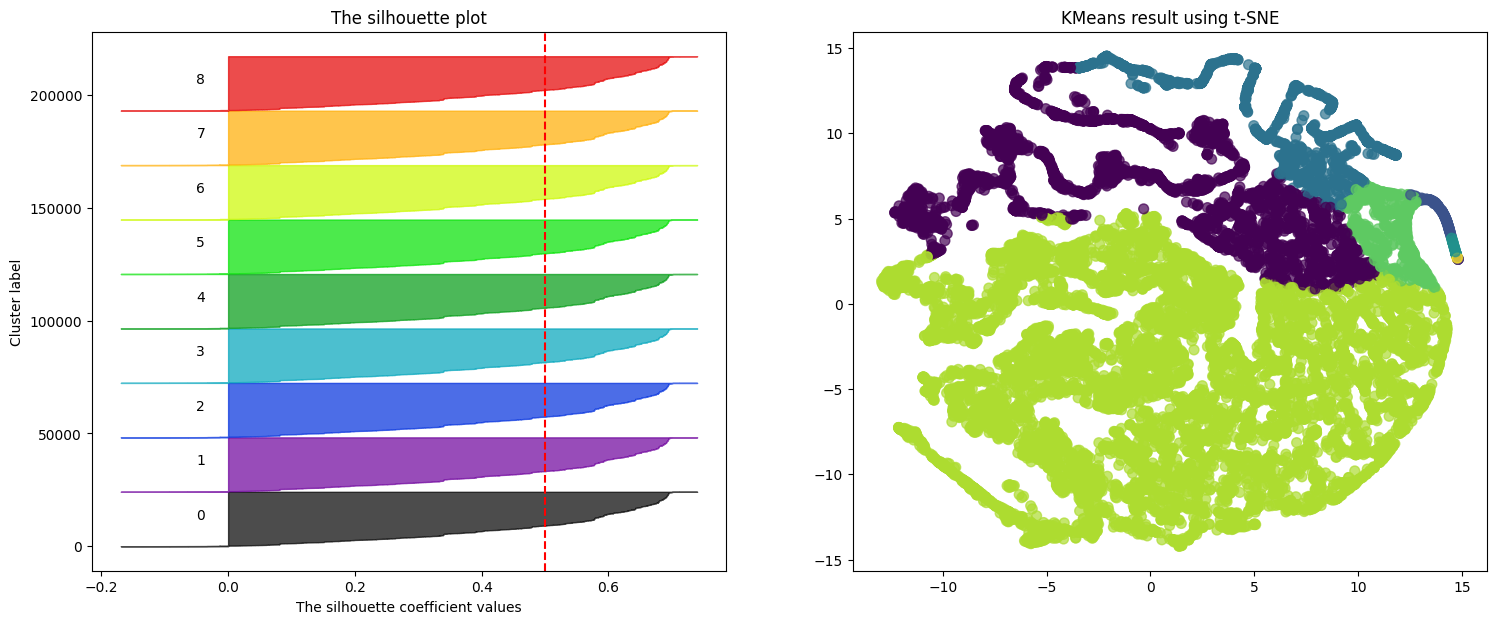

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

y_lower = 10 
for i in range(clustering_model.n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        silhouette_vals.sort()

        size_cluster_i = silhouette_vals.shape[0]

        y_upper = y_lower + len(silhouette_vals)
        color = cm.nipy_spectral(float(i)/clustering_model.n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                          0, silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 


ax1.set_title("The silhouette plot")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


ax2.scatter(x_tsne[:, 0], x_tsne[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
ax2.set_title("KMeans result using t-SNE")

## 10.2. Clustering using the cleaned dataset
[$\leftarrow$ Back to contents](#Contents)  

Extract the very same features 

In [138]:
feature_vectors = pd.DataFrame(encoder.fit_transform(df[['Settore Merceologico Principale', 'Settore Merceologico Secondario',
       'Insegna', 'Tipo via', 'Via', 'Civico', 'Codice via', 'ZD', 'Accesso',
       'Isolato', 'Settore Storico Cf Preval']]))

In [139]:
feature_vectors[[feature_vectors.shape[1],feature_vectors.shape[1]+1]] = df[['Superficie Vendita','Superficie Altri Usi']]

In [140]:
feature_vectors

,0,1,2,3,4,5,6,7,8,9,...,12785,12786,12787,12788,12789,12790,12791,12792,12793,12794
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21831,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,64.0
21832,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,15.0
21833,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,12.0
21834,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,125.0


Run KMeans

In [141]:
clustering_model = KMeans(n_clusters=9,n_init='auto',random_state=42)
cluster_labels = clustering_model.fit_predict(feature_vectors)

Compute silhouette scores

In [142]:
silhouette_vals = silhouette_samples(feature_vectors, cluster_labels) # the silhouette value for each sample
silhouette_avg = silhouette_score(feature_vectors, cluster_labels) # the mean value of each sample
silhouette_avg

0.604444541035374

Reduce dimensionality and plot resluts

In [143]:
x_tsne = tsne.fit_transform(feature_vectors)

Text(0.5, 1.0, 'KMeans result using t-SNE')

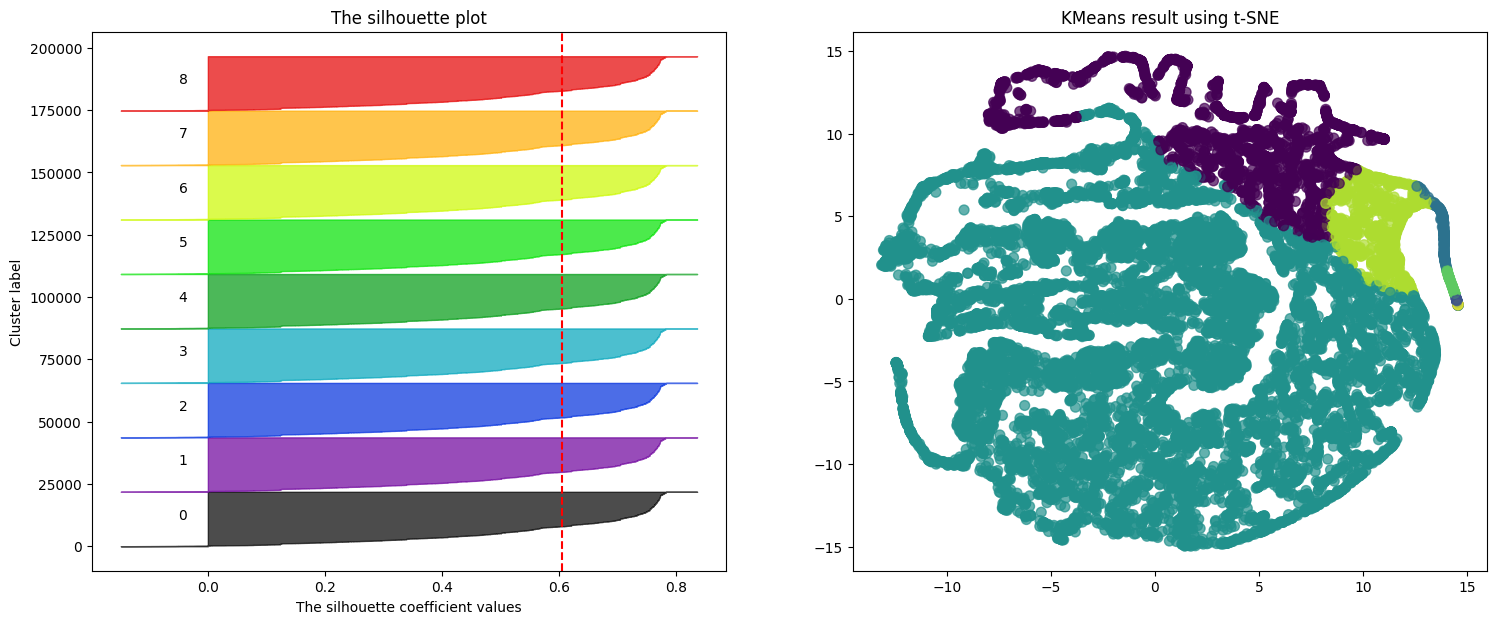

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

y_lower = 10 
for i in range(clustering_model.n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        silhouette_vals.sort()

        size_cluster_i = silhouette_vals.shape[0]

        y_upper = y_lower + len(silhouette_vals)
        color = cm.nipy_spectral(float(i)/clustering_model.n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                          0, silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 


ax1.set_title("The silhouette plot")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


ax2.scatter(x_tsne[:, 0], x_tsne[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
ax2.set_title("KMeans result using t-SNE")